## STAGE 1 - EXPLORATORY DATA ANALYSIS




**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
!pip install datatile
import datatile
from datatile.summary.df import DataFrameSummary
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
mpl.rcParams['font.family'] = 'sans-serif'
import seaborn as sns
plt.style.use('ggplot')
sns.set()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 2.7 MB/s eta 0:00:00


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [ ]:
!gdown 1Ug89rLFlYNGvZHKLORzQmMnZsdSXvgUn

Downloading...
From: https://drive.google.com/uc?id=1Ug89rLFlYNGvZHKLORzQmMnZsdSXvgUn
To: /content/aug_train.csv
100% 1.96M/1.96M [00:00<00:00, 43.5MB/s]


## Describe Data

# Exploratory Data Analysis (EDA)

In [ ]:
path = 'aug_train.csv'
df = pd.read_csv(path)
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


### Statistics Summary

In [ ]:
df.shape

(19158, 14)

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [20]:
df.relevent_experience.value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

- Kolom enrollee_id diubah menjadi object karena merupakan menanda bukan angka untuk dihitung.
- kolom experience seharusnya int agar mudah untuk dikelompokan untuk menjadi kategori
- last_new_job seharusnya int
- rename columns 'last_new_job' to'last_job_tenure' and  'enrolled_university' to 'current_enrolled_status'
- kolom relevent_experience valuenya binary (Has Relevent Experience and No relevent experience) seharusnya diganti dengan tipe data Boolean True/False

In [ ]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

###Missing Value

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [ ]:
#mencari NaN values
df.isna().apply(pd.value_counts)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
False,19158.0,19158.0,19158.0,14650,19158.0,18772,18698,16345,19093,13220,13018,18735,19158.0,19158.0
True,NaN,NaN,NaN,4508,NaN,386,460,2813,65,5938,6140,423,NaN,NaN


In [ ]:
missing = df.isnull().sum()*100 / len(df)

percentage_missing = pd.DataFrame({'column':df.columns,
                                   'missing_percentage %':missing.values})
percentage_missing['missing_percentage %'] = percentage_missing['missing_percentage %'].round(2)
percentage_missing = percentage_missing.sort_values('missing_percentage %', ascending=False)
percentage_missing = percentage_missing.reset_index()
percentage_missing = percentage_missing.drop('index', axis=1)

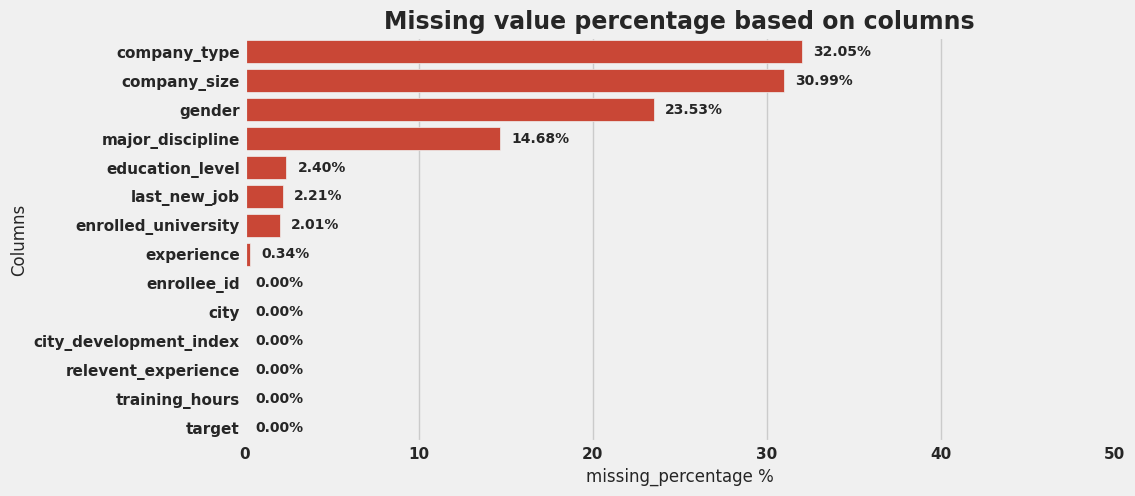

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='missing_percentage %', y='column', data=percentage_missing, color='#E1341E')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width() + '%', xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(8, 0), textcoords='offset points' ,ha="left", va="center", fontsize=10)
plt.title('Missing value percentage based on columns', fontsize=17, fontweight='bold')
plt.ylabel('Columns', fontsize=12)
plt.xlabel('missing_percentage %', fontsize=12)
plt.xlim(0,50)
plt.show()

### Kolom dengan nilai kosong:
- ***company_type*** sebanyak 6140 ***(32.05%)***
- company_size sebanyak 5938 (30.99%)
- gender sebanyak 4508 (23.53%)
- major_discipline sebanyak 2813 (14.68%)
- education_level sebanyak 460 (2.4%)
- last_new_job sebanyak 423 (2.21%)
- enrolled_university sebanyak 386 (2.01%)
- experience sebanyak 65 (0.34%)


Kolom yang memiliki data kosong merupakan tipe data kategorik. Sehingga untuk tindak lanjut, akan dilakukan pengisian data-data yang kosong dengan nilai modus dari kategori masing-masing.



####Kolom Numerik

In [ ]:
nums=['city_development_index', 'training_hours','target']
cats=['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','company_type','last_new_job','experience','company_size']

In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


### Kolom numerik
city development index
- Rata-rata ***city_development_index*** enrollee adalah 0.829. Nilai minnya adalah 0.448 dan max-nya 0.949, rentangnya tidak jauh berbeda menandakan tidak ada outlier atau outlier hanya sedikit.
- Karena value mean < median
- Q1 = 0.74; Q2 = 0.903; Q3 = 0.949 |Q2 -Q1 >  Q3 - Q2
- Maka, sebaran datanya negatively skewed atau right skewed yang artinya data lebih condong  ke kiri atau lebih condong ke value yang lebih besar


training hours
- Rata-rata ***training_hours*** yang dijalani oleh enrollee adalah 65 jam. Rentang tersebut menunjukkan perbedaan besar antara nilai min yang sebesar 1 jam dan nilai max yang menunjukkan 336 jam, hal ini menunjukkan bukti adanya outlier.
- value mean > median
- Q1 = 23; Q2 = 47; Q3 = 88 | Q3 - Q2 > Q2 -Q1
- Maka sebaran datanya positively skewed atau left skewed yang artinya data lebih condong ke kanan atau lebih condong ke value yang lebih kecil
- Kolom ini hanya digunakan untuk insight dan tidak digunakan dalam training model dikarenakan training hours hanya didapatkan setelah melakukan training. Model ingin di tempatkan setelah pendaftaran untuk memprediksi enrollee sebelum melakukan training.

**Total count of individual data elements**

In [ ]:
for col in nums:
    print(f'''Value Count column {col}:''')
    print(df[col].value_counts())
    print()

Value Count column city_development_index:
0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64

Value Count column training_hours:
28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: training_hours, Length: 241, dtype: int64

Value Count column target:
0.0    14381
1.0     4777
Name: target, dtype: int64



### Kolom Kategorik

In [ ]:
df[cats].describe().T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083


**Total count of individual data elements**

In [ ]:
for col in cats:
    print(f'''Value Count column {col}:''')
    print(df[col].value_counts())
    print()

Value Count column city:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

Value Count column gender:
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

Value Count column relevent_experience:
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

Value Count column enrolled_university:
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

Value Count column education_level:
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

Value Count column major_discipline:
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts      

### Kolom kategorik
- City dan experience terlalu banyak unique value
- data gender skewed karena male sebagai frekuensi terbanyak mencapai 90% dari jumlah count
- relevant experience tipe data diskrit. ada ketimpangan data karena yang has relevant experience mencakup lebih dari 70% keseluruhan data
- data data yang pada individual count kurang dari 1% akan dikategorikan lagi dan digabung dengan kategori lain untuk ditinjau ulang apakah dihapus atau tidak

## Pendekatan Grafis

### Univariate Analysis

In [ ]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


### Kolom Numerik

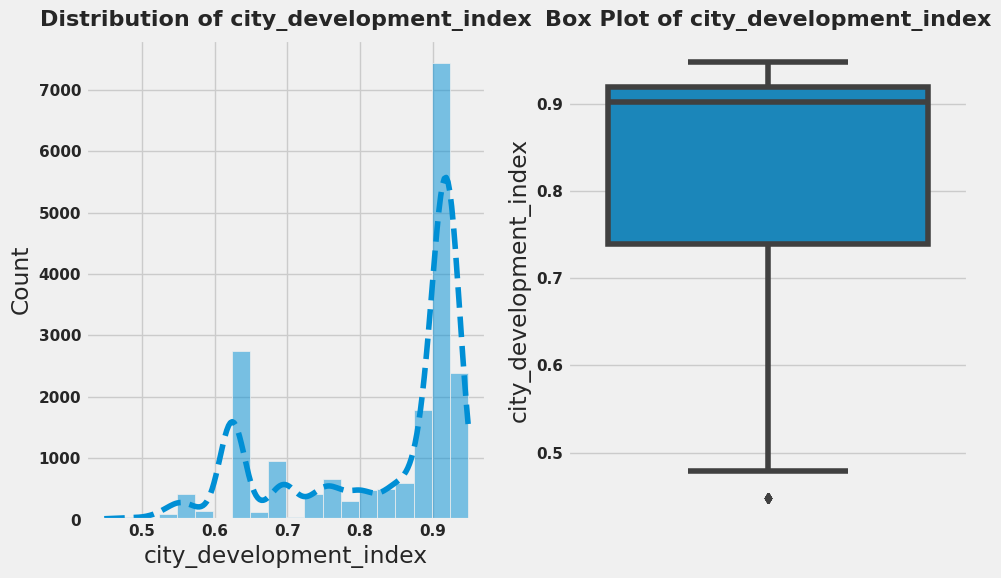

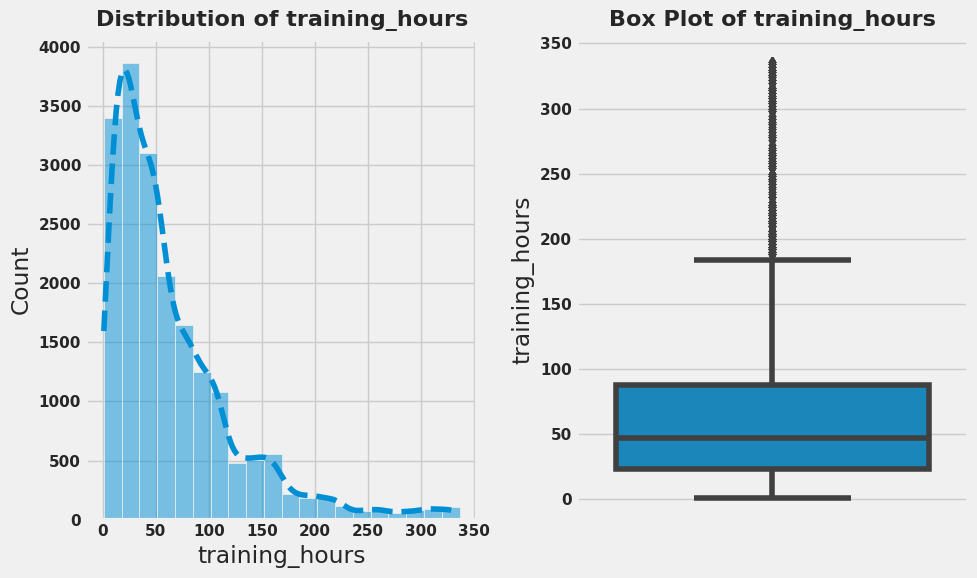

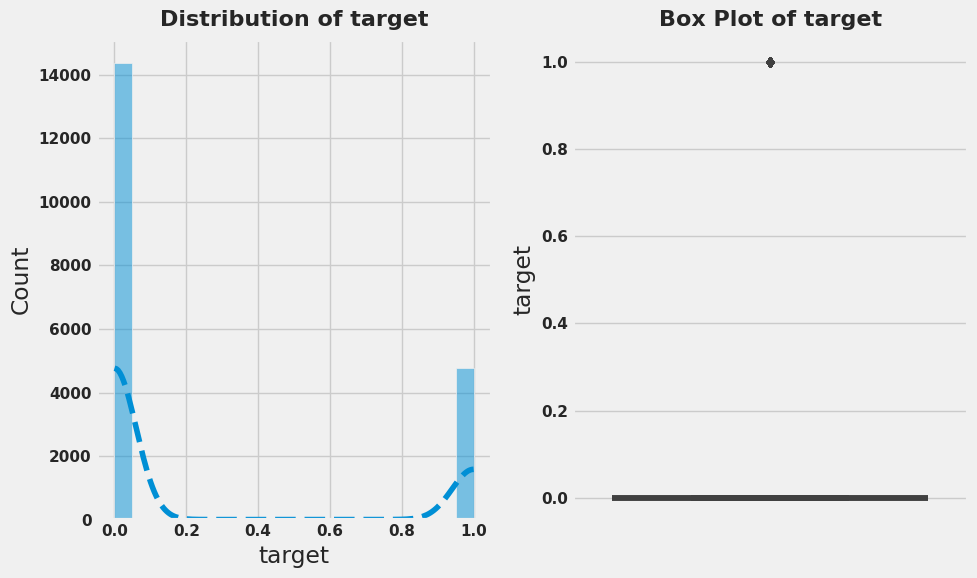

In [ ]:
feature_nums=['city_development_index','training_hours','target']
# Univariate analysis for numerical features
for feature in feature_nums:
    # Create a subplot for each numerical feature
    plt.figure(figsize=(10, 6))

    # Histogram for numerical features
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}', size=16, fontweight='bold', pad=10)

    # Box plot for numerical features
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}', size=16, fontweight='bold', pad=10)

    plt.tight_layout()
    plt.show()

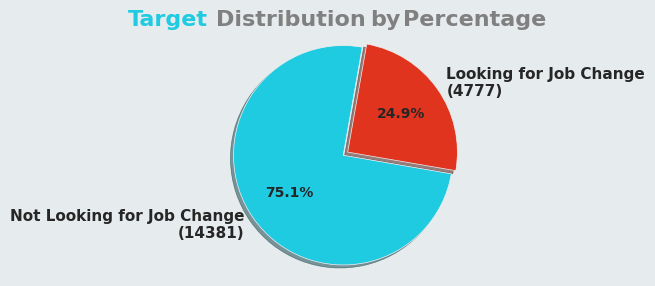

In [ ]:
# Count the occurrences of each 'target' category
target_counts = df['target'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(6, 3))
fig.patch.set_facecolor('#e6ebed')

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'

wedges, texts, autotexts = ax.pie(target_counts,
                                   explode=(0.05, 0),
                                   labels=['Not Looking for Job Change', 'Looking for Job Change'],
                                   colors=['#1ECBE1', '#E1341E'],
                                   autopct='%1.1f%%',
                                   shadow=True,
                                   startangle=80)

plt.axis('equal')

# Display the total count of each category as text
for i, text in enumerate(texts):
    text.set(text=texts[i].get_text() + f'\n({target_counts.iloc[i]})')

plt.text(-2, 1.15, "Target", size=16, color='#1ECBE1', fontweight="bold")
plt.text(-1.2, 1.15, "Distribution", size=16, color="grey", fontweight="bold")
plt.text(0.2, 1.15, "by", size=16, color="grey")
plt.text(0.5, 1.15, "Percentage", size=16, color="grey", fontweight="bold")

plt.show()

In [ ]:
# Calculate the kurtosis
city_dev_index_kurtosis = df['city_development_index'].kurtosis()
th_kurtosis = df['training_hours'].kurtosis()

# Interpret the kurtosis value
if city_dev_index_kurtosis > 0:
    kurtosis_interpretation_c = "Leptokurtic (more peaked and heavy-tailed)"
elif city_dev_index_kurtosis < 0:
    kurtosis_interpretation_c = "Platykurtic (flatter and light-tailed)"
else:
    kurtosis_interpretation_c = "Mesokurtic (similar to a normal distribution)"

if th_kurtosis > 0:
    kurtosis_interpretation = "Leptokurtic (more peaked and heavy-tailed)"
elif th_kurtosis < 0:
    kurtosis_interpretation = "Platykurtic (flatter and light-tailed)"
else:
    kurtosis_interpretation = "Mesokurtic (similar to a normal distribution)"


# Display the results
print("Kurtosis of City Development index", city_dev_index_kurtosis)
print(f"Interpretation: {kurtosis_interpretation_c}")


print("Kurtosis of Training Hours", th_kurtosis)
print(f"Interpretation: {kurtosis_interpretation}")

Kurtosis of City Development index -0.5385321590913694
Interpretation: Platykurtic (flatter and light-tailed)
Kurtosis of Training Hours 3.8405393627164734
Interpretation: Leptokurtic (more peaked and heavy-tailed)


In [ ]:
# Range: Difference between the maximum and minimum values
city_dev_index_range = df['city_development_index'].max() - df['city_development_index'].min()
th_range = df['training_hours'].max() - df['training_hours'].min()

# Variance: Measure of data point variability from the mean
city_dev_index_variance = df['city_development_index'].var()
th_variance = df['training_hours'].var()

# Standard Deviation: Average amount of deviation from the mean
city_dev_index_std_dev = df['city_development_index'].std()
th_std_dev = df['training_hours'].std()

# Interquartile Range (IQR): Spread between Q1 and Q3
city_dev_index_iqr = df['city_development_index'].quantile(0.75) - df['city_development_index'].quantile(0.25)
th_iqr = df['training_hours'].quantile(0.75) - df['training_hours'].quantile(0.25)

statistics_df_num = pd.DataFrame({
    'Statistic': ['Range', 'Variance', 'Standard Deviation', 'Interquartile Range (IQR)'],
    'City Development Index': [city_dev_index_range, city_dev_index_variance, city_dev_index_std_dev, city_dev_index_iqr],
    'Training Hours': [th_range, th_variance, th_std_dev, th_iqr]})

statistics_df_num

,Statistic,City Development Index,Training Hours
0,Range,0.501000,335.000000
1,Variance,0.015218,3607.018849
2,Standard Deviation,0.123362,60.058462
3,Interquartile Range (IQR),0.180000,65.000000


In [ ]:
# Outliers
# Calculate the lower and upper fences
lower_fence = df['city_development_index'].quantile(0.25) - 1.5 * city_dev_index_iqr
upper_fence = df['city_development_index'].quantile(0.75)+ 1.5 * city_dev_index_iqr

count_low = len(df[df['city_development_index'] < lower_fence])
count_up = len(df[df['city_development_index'] > upper_fence])

# Display the count
print(f"Lower Whisker for city development index: {lower_fence:.2f}")
print(f"Upper Whisker for city development index: {upper_fence:.2f}")
print(f"Jumlah data yang termasuk outliers < {lower_fence}: {count_low}")
print(f"Jumlah data yang termasuk outliers > {upper_fence}: {count_up}")

Lower Whisker for city development index: 0.47
Upper Whisker for city development index: 1.19
Jumlah data yang termasuk outliers < 0.4699999999999999: 17
Jumlah data yang termasuk outliers > 1.1900000000000002: 0


In [ ]:
# Outliers
# Calculate the lower and upper fences
lower_fence = df['training_hours'].quantile(0.25) - 1.5 *  th_iqr
upper_fence = df['training_hours'].quantile(0.75)+ 1.5 *  th_iqr

count_low = len(df[df['training_hours'] < lower_fence])
count_up = len(df[df['training_hours'] > upper_fence])

# Display the count
print(f"Lower Whisker for training hours: {lower_fence:.2f}")
print(f"Upper Whisker for training hours: {upper_fence:.2f}")
print(f"Jumlah data yang termasuk outliers < {lower_fence}: {count_low}")
print(f"Jumlah data yang termasuk outliers > {upper_fence}: {count_up}")

Lower Whisker for training hours: -74.50
Upper Whisker for training hours: 185.50
Jumlah data yang termasuk outliers < -74.5: 0
Jumlah data yang termasuk outliers > 185.5: 984


## Distribusi Data Numerik

### Kolom target
- terdapat ketimpangan data kelas 75,1% : 24,9%
- untuk train model data kelas akan diseimbangkan agar mesin tidak condong memprediksi lebih akurat ke satu kelas saja

### Kolom city_development_index
- histogram berbentuk ***negatively skewed*** yaitu tipe distribusi yang nilai lebih banyak diplot di sisi kanan grafik, ekor distribusi lebih panjang di sisi kiri. Artinya frekuensi data lebih condong ke nilai yang lebih besar.
- mean lebih rendah daripada median dan modus. ***mean = 0.828848 < median = 0.903000 < modus = 0.920***
- kurtosis berjenis ***platykurtic*** yang artinya data pada kolom 'city_development_index' memiliki nilai ekstrim atau outlier yang lebih sedikit.
- dengan metode IQR, didapatkan batas bawah sebesar 0.47 dan batas atas sebesar 1.19. data yang termasuk kedalam outlier ada 17 data.


### Kolom training_hours
- histogram berbentuk ***positively skewed*** yaitu tipe distribusi yang nilai lebih banyak diplot di sisi kiri grafik, ekor distribusi lebih panjang di sisi kanan. Artinya frekuensi data lebih condong ke nilai yang lebih kecil.
- mean lebih besar daripada median dan modus. ***mean = 65.366896 < median = 47 < modus = 28
- kurtosis berjenis ***Leptokurtic*** yang artinya data pada kolom 'training_hours' memiliki nilai atau outlier yang lebih ekstrim.
- dengan metode IQR, didapatkan batas bawah sebesar -74.5 dan batas atas sebesar 185.5. data yang termasuk kedalam outlier ada 984 data.


## Distribusi Data Kategorik

Kota mana sebagian besar enrollee berasal?

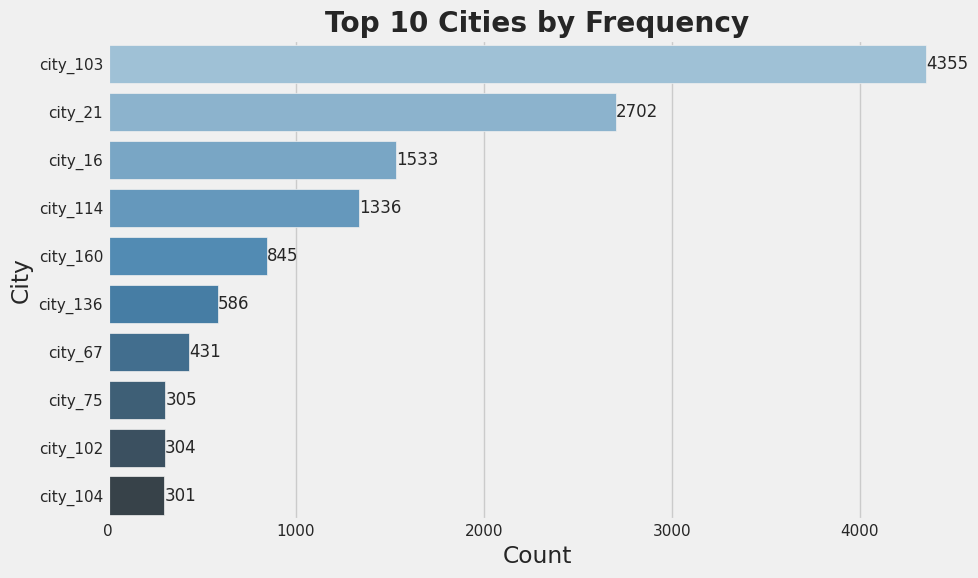

In [ ]:
data_city = df['city'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=data_city.index, x=data_city, palette="Blues_d")

plt.xlabel('Count')
plt.ylabel('City')
plt.title('Top 10 Cities by Frequency', fontweight='bold')

# Add annotations for each bar
for i, v in enumerate(data_city):
    ax.text(v, i, str(v), ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

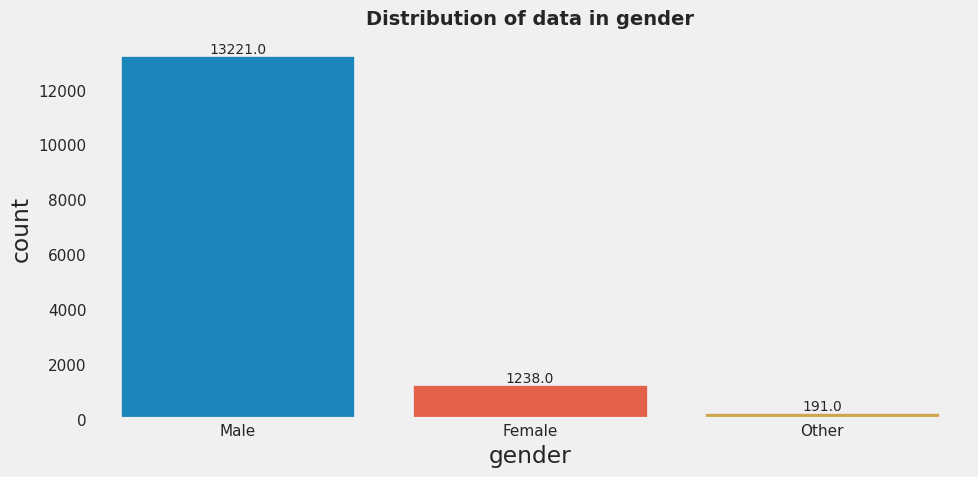

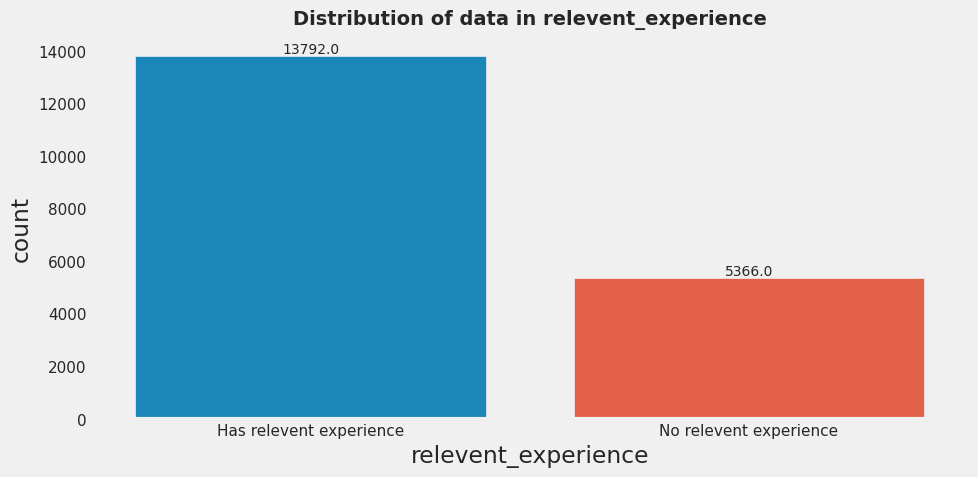

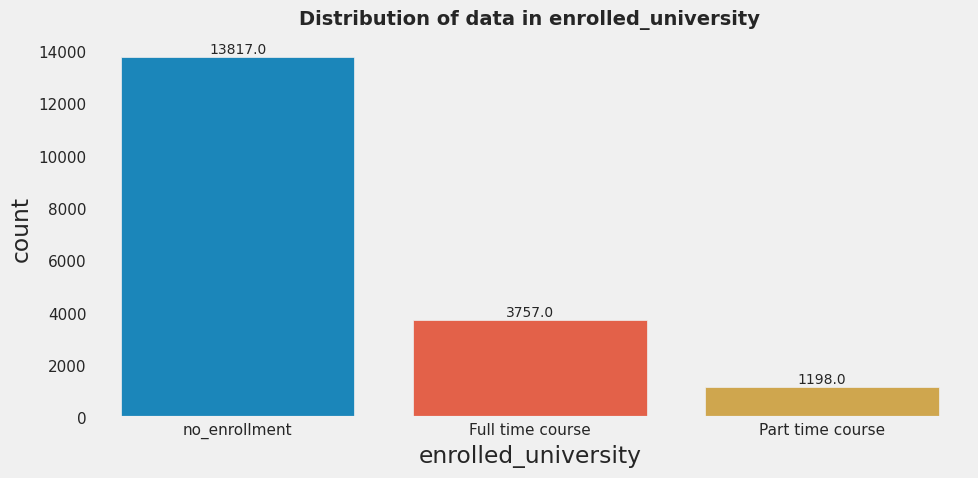

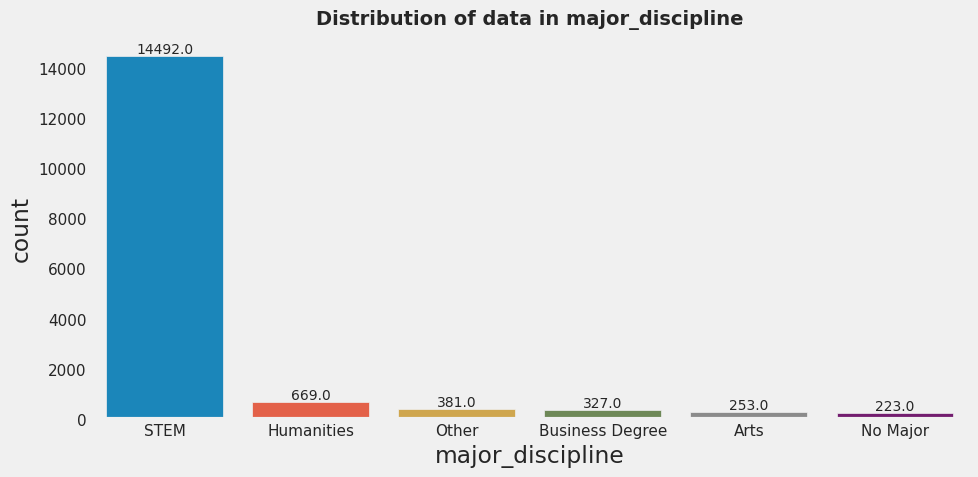

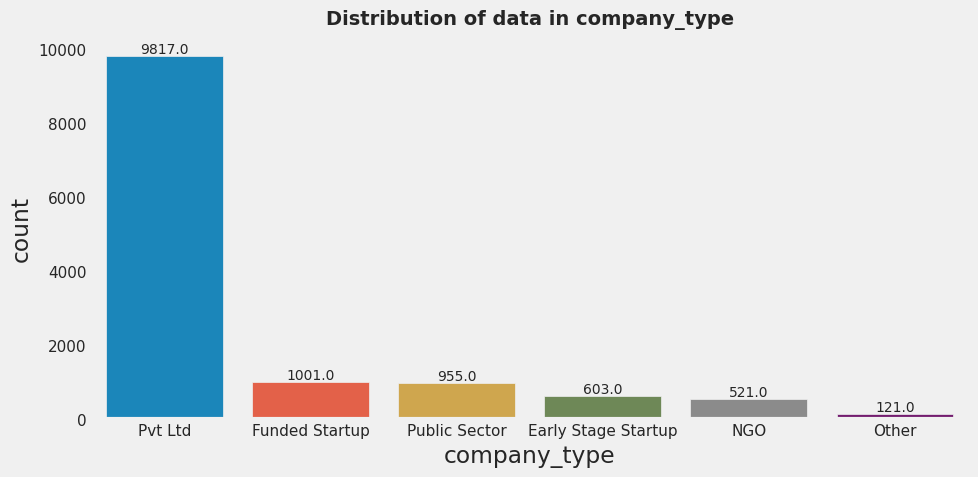

In [ ]:
cats_feature=[ 'gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type']

# Univariate analysis for categorical features
for feature in cats_feature:
    # Create a subplot for each categorical feature
    plt.figure(figsize=(10, 5))

    # Countplot for categorical features
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of data in {feature}', size=14, fontweight='bold', pad=10)

    # Add frequency (count) labels to the bars
    total_count = len(df)
    ax = plt.gca()  # gets the current axes so that you can draw on it directly
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', size=10)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

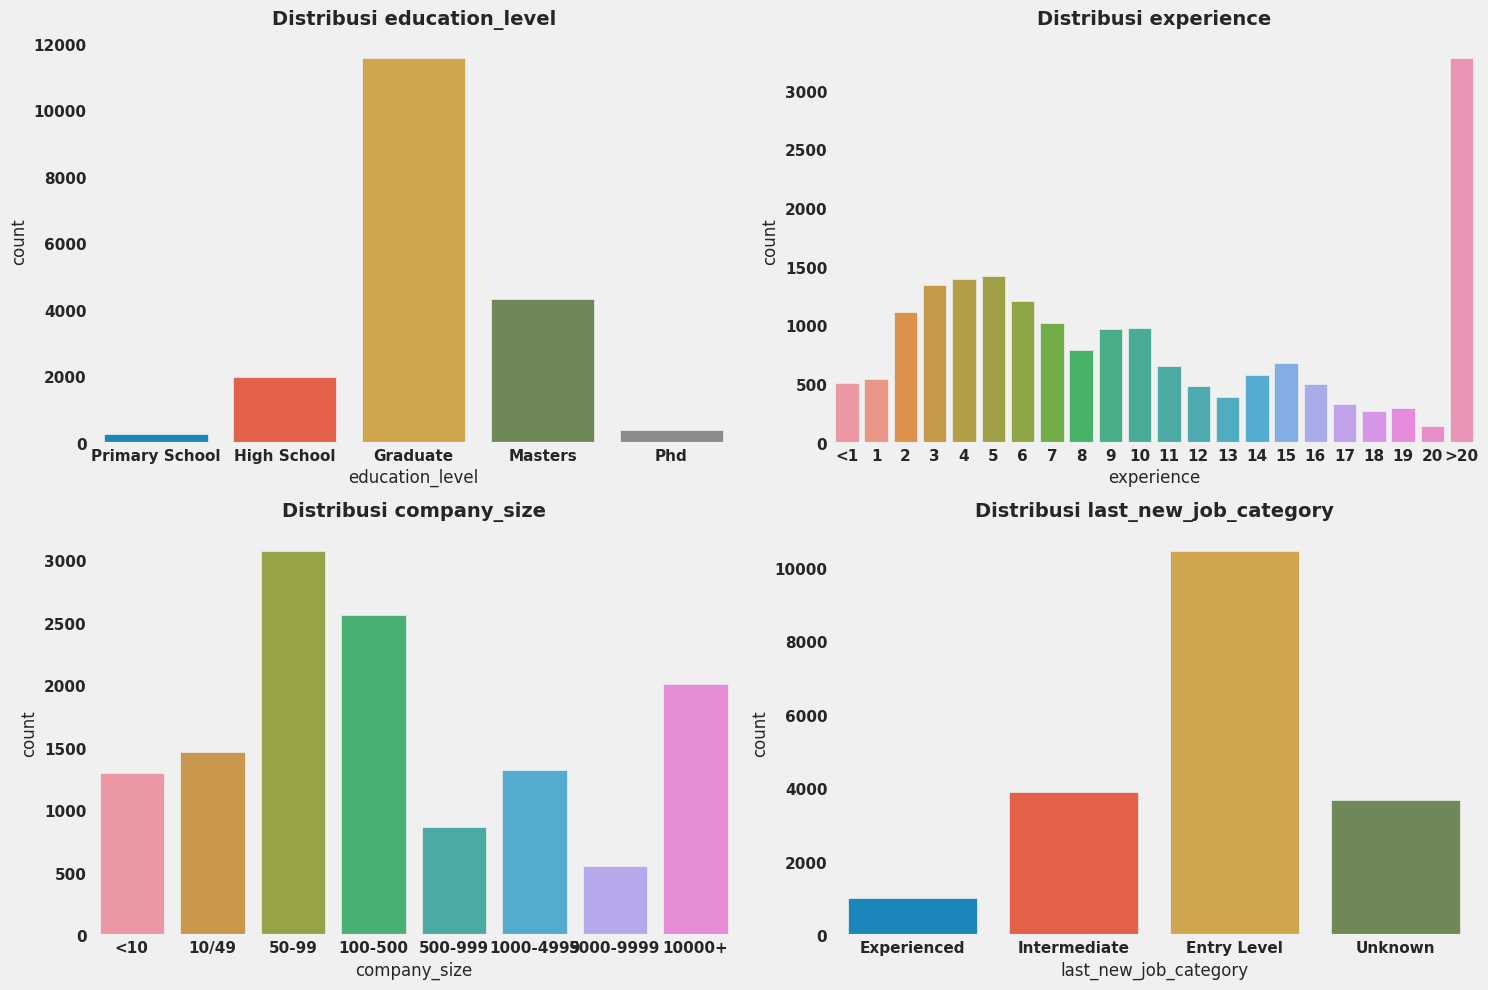

In [ ]:
cats_ordinal = ['education_level', 'experience', 'company_size', 'last_new_job_category']
# Kode untuk mengkategorikan kolom 'last_new_job' menjadi 'last_new_job_category'
conditions_last_job = [
    (df['last_new_job'] == '4'),
    (df['last_new_job'] > '1') & (df['last_new_job'] <= '4'),
    (df['last_new_job'].isin(['1', '<1', 'never']))
]

choices_last_job = ['Experienced', 'Intermediate', 'Entry Level']
df['last_new_job_category'] = np.select(conditions_last_job, choices_last_job, default='Unknown')


# Tentukan urutan untuk setiap fitur kategoris
feature_orders = {
    'education_level': ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd'],
    'experience': ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20'],
    'company_size': ['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'],
    'last_new_job_category': ['Experienced', 'Intermediate', 'Entry Level','Unknown']
}
cats_ordinal = ['education_level', 'experience', 'company_size', 'last_new_job_category']
# Buat satu gambar untuk semua plot hitung
plt.figure(figsize=(15, 10))

for i, feature in enumerate(cats_ordinal):
    plt.subplot(2, 2, i + 1)  # Buat subplot untuk setiap fitur kategoris
    sns.countplot(data=df, x=feature, order=feature_orders[feature])
    plt.title(f'Distribusi {feature}', size=14, fontweight='bold', pad=10)
    plt.grid(False)

choices_last_job = ['Experienced', 'Intermediate', 'Entry Level']
df['last_new_job_category'] = np.select(conditions_last_job, choices_last_job, default='Unknown')

plt.tight_layout()
plt.show()

Berdasarkan data perhitungan frekuensi di atas, data yang dianggap langka atau memiliki frekuensi sangat kecil (<2% setelah dikategorikan ulang) akan dihilangkan.
***kolom***
- 'gender' untuk kategori 'other' akan dihilangkan karena hanya 1% dari keseluruhan data
- 'education_level' akan dievaluasi lagi apakah datanya penting untuk kategori 'Phd' dan 'Primary School'
- 'major_discipline' akan dihapus untuk kategori 'other', 'business degree', 'arts', 'no major'
- 'experience' akan dikelompokkan menjadi range
- 'company_size' akan dikelompokkan ulang agar lebih general.
- 'company_type' untuk kategori 'other akan dihapus.
- 'last_new_job' akan dikategorikan ulang



In [ ]:
# Kolom city_development_index
conditions_city = [
    (df['city_development_index'] > 0.9),
    (df['city_development_index'] >= 0.8) & (df['city_development_index'] <= 0.9),
    (df['city_development_index'] < 0.8)
]

choices_city = ['Highly Developed Cities', 'Moderately Developed Cities', 'Less Developed Cities']
df['city_category'] = np.select(conditions_city, choices_city, default='Unknown')

# Kolom last_new_job
conditions_last_job = [
    (df['last_new_job'] == '>4'),
    (df['last_new_job'] >= '2') & (df['last_new_job'] <= '4'),
    (df['last_new_job'].isin(['1', '<1', 'never']))
]

choices_last_job = ['Experienced', 'Intermediate', 'Entry Level']
df['last_new_job_category'] = np.select(conditions_last_job, choices_last_job, default='Unknown')

# Kolom experience
def categorize_experience(experience):
    experience = str(experience)
    if experience in ['11', '12', '13', '14', '15', '17', '18', '19', '20', '>20']:
        return 'Senior Level'
    elif experience in ['4', '5', '6', '7', '8', '9', '10']:
        return 'Intermediate Level'
    elif experience in ['<1', '1', '2', '3']:
        return 'Junior Level'
    return 'Unknown'

df['experience_category'] = df['experience'].apply(categorize_experience)

# Kolom company_size
conditions_company_size = [
    (df['company_size'].isin(['50-99', '<10'])),
    (df['company_size'].isin(['100-500', '50-499', '500-999'])),
    (df['company_size'].isin(['1000-4999', '5000-9999', '10000+']))
]

choices_company_size = ['Small', 'Medium', 'Large']
df['company_size_category'] = np.select(conditions_company_size, choices_company_size, default='Unknown')

# Kolom company_type
conditions_company_type = [
    (df['company_type'] == 'Pvt Ltd'),
    (df['company_type'].isin(['Funded Startup', 'Early Stage Startup'])),
    (df['company_type'] == 'Public Sector'),
    (df['company_type'] == 'NGO')
]

choices_company_type = ['Private Sector', 'Startup', 'Public Sector', 'Non-Governmental Organization']
df['company_type_category'] = np.select(conditions_company_type, choices_company_type, default='Other')

# Kolom gender
conditions_gender = df['gender'].isin(['Female', 'Male'])

df['gender_category'] = df[conditions_gender]['gender']

# Kolom major_discipline
conditions_major_discipline = df['major_discipline'].isin(['STEM', 'Humanities'])

df['major_discipline_category'] = df[conditions_major_discipline]['major_discipline']


# Generalized Category
Berdasarkan nilai unik pada kolom-kolom yang telah disebutkan, berikut adalah pengkategorian yang lebih umum untuk masing-masing kolom:

1. city_development_index: Indeks perkembangan kota dapat dikelompokkan menjadi:

- Highly Developed Cities (Kota yang sangat berkembang): Nilai indeks di atas 0.9, misalnya 0.92, 0.913, 0.926, dst.
- Moderately Developed Cities (Kota yang cukup berkembang): Nilai indeks antara 0.8 hingga 0.9, misalnya 0.804, 0.843, 0.855, dst.
- Less Developed Cities (Kota yang kurang berkembang): Nilai indeks di bawah 0.8, misalnya 0.624, 0.776, 0.789, dst.

2. last_new_job: Pengkategorian ini sesuai dengan lamanya pengalaman kerja sebelumnya (previous job) sebelum beralih ke pekerjaan saat ini (current job):

- Experienced (Berpengalaman): Jika lamanya pengalaman lebih dari 4 tahun (misalnya, '>4').
- Intermediate (Menengah): Jika lamanya pengalaman 2 hingga 4 tahun (misalnya, '2', '3', '4').
- Entry Level (Tingkat Pemula): Jika lamanya pengalaman kurang dari 2 tahun (misalnya, '1', '<1') atau jika keterangan adalah 'never' (belum pernah bekerja).

3. experience: Lamanya pengalaman kerja individu dapat dikelompokkan sebagai berikut:

- Junior Level (Pemula): Pengalaman kurang dari 1 tahun (misalnya, '<1').
- Intermediate Level (Menengah): Pengalaman 1 hingga 5 tahun (misalnya, '1', '2', '3', '4', '5').
- Senior Level (Berpengalaman): Pengalaman lebih dari 5 tahun (misalnya, '>20', '15', '20', dst.).

4. company_size: Ukuran perusahaan dapat dikelompokkan sebagai berikut:

- Small (Kecil): Kurang dari 50 karyawan (misalnya, '<10', '10/49').
- Medium (Sedang): 50 hingga 999 karyawan (misalnya, '50-99', '100-500', '500-999').
- Large (Besar): Lebih dari 1000 karyawan (misalnya, '1000-4999', '5000-9999', '10000+').

5. company_type: Tipe perusahaan dapat dikelompokkan sebagai berikut:

- Private Sector (Swasta): Perusahaan swasta seperti 'Pvt Ltd'.
- Startup (Perusahaan Rintisan): Perusahaan startup seperti 'Funded Startup' dan 'Early Stage Startup'.
- Other (Lainnya): Jenis perusahaan lainnya yang tidak termasuk dalam kategori di atas.
Public Sector (Pemerintah): Perusahaan sektor publik atau pemerintah seperti 'Public Sector'.
- Non-Governmental Organization (Organisasi Non-Pemerintah): Organisasi non-pemerintah seperti 'NGO'.

Pengkategorian ini membantu dalam analisis data dengan memberikan wawasan yang lebih umum tentang variabel-variabel tersebut.

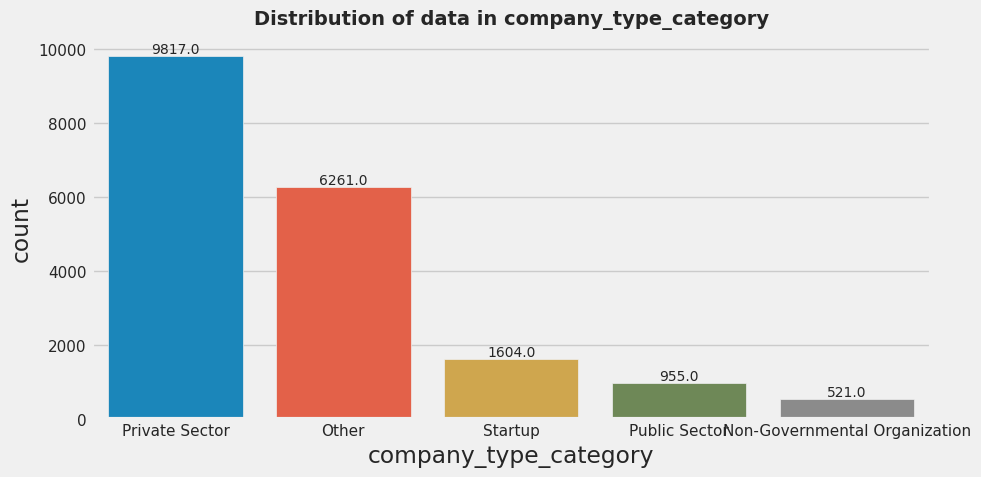

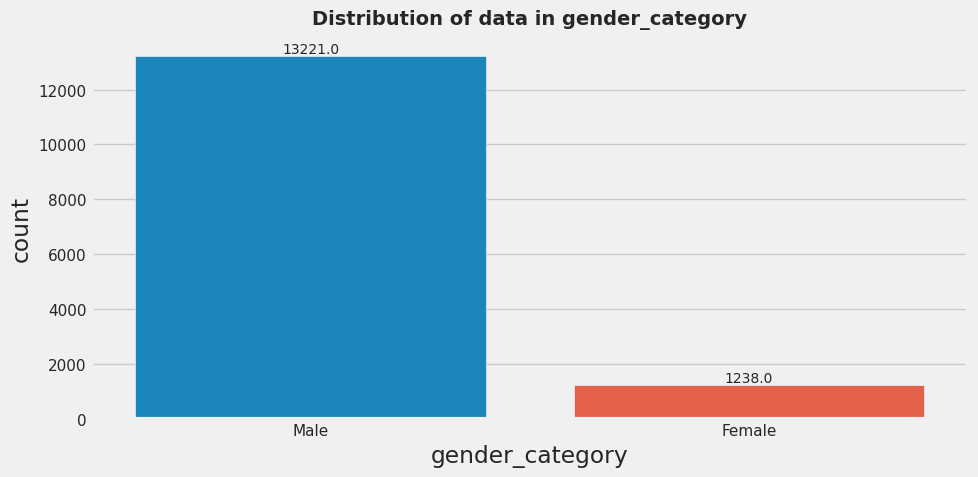

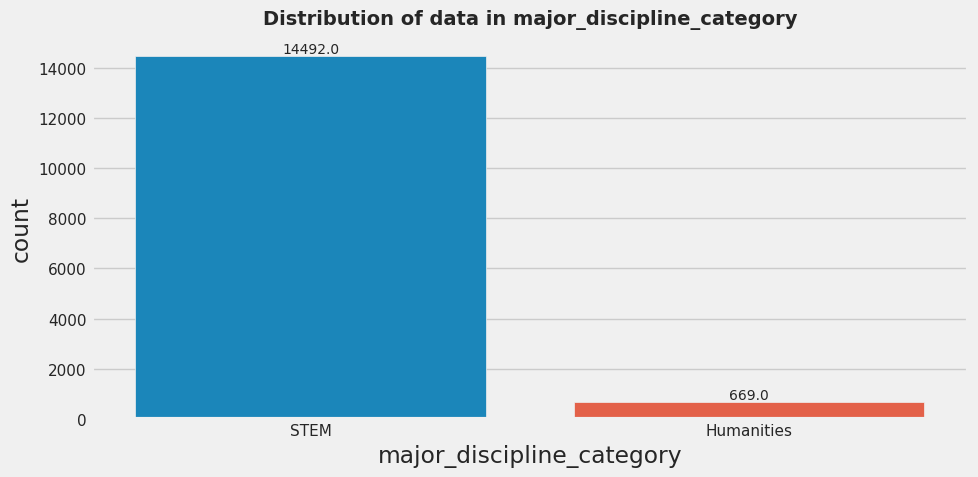

In [ ]:
cats_feature=['company_type_category', 'gender_category', 'major_discipline_category']

# Tentukan urutan untuk setiap fitur kategoris
feature_orders = {
    'company_type_category': ['Private Sector', 'Startup', 'Public Sector', 'Non-Governmental Organization'],
    'gender_category': ['Male', 'Female'],
    'major_discipline_category': ['STEM', 'Humanities']
}

# Univariate analysis for categorical features
for feature in cats_feature:
    # Create a subplot for each categorical feature
    plt.figure(figsize=(10, 5))

    # Countplot for categorical features
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of data in {feature}', size=14, fontweight='bold', pad=10)

    # Add frequency (count) labels to the bars
    total_count = len(df)
    ax = plt.gca()  # gets the current axes so that you can draw on it directly
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', size=10)

    plt.tight_layout()
    plt.show()

<Figure size 1500x1000 with 0 Axes>

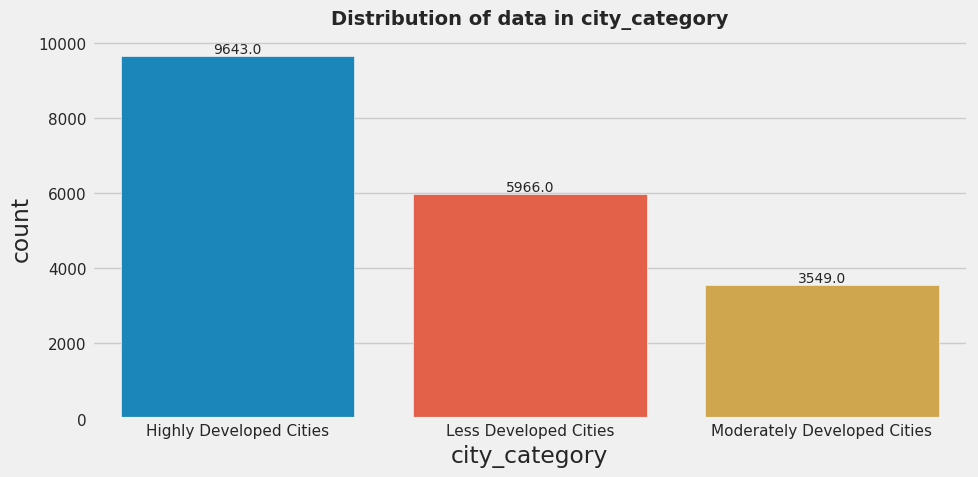

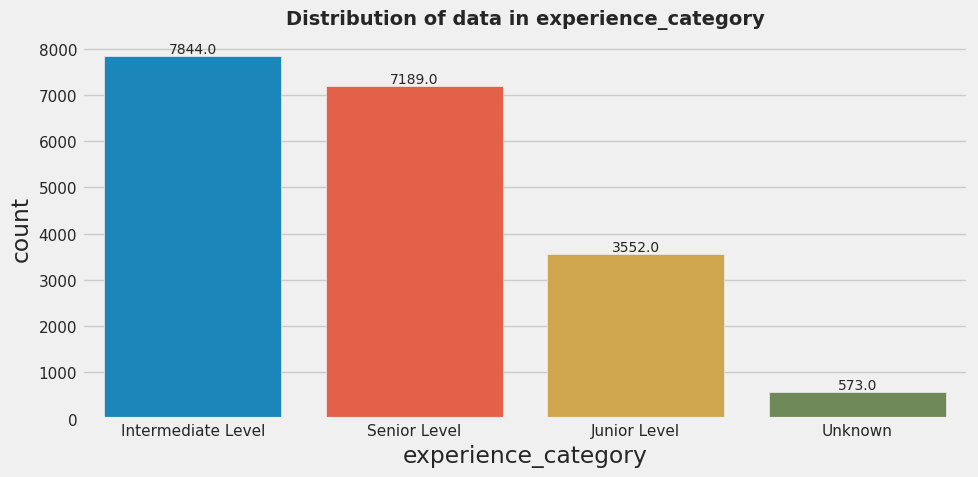

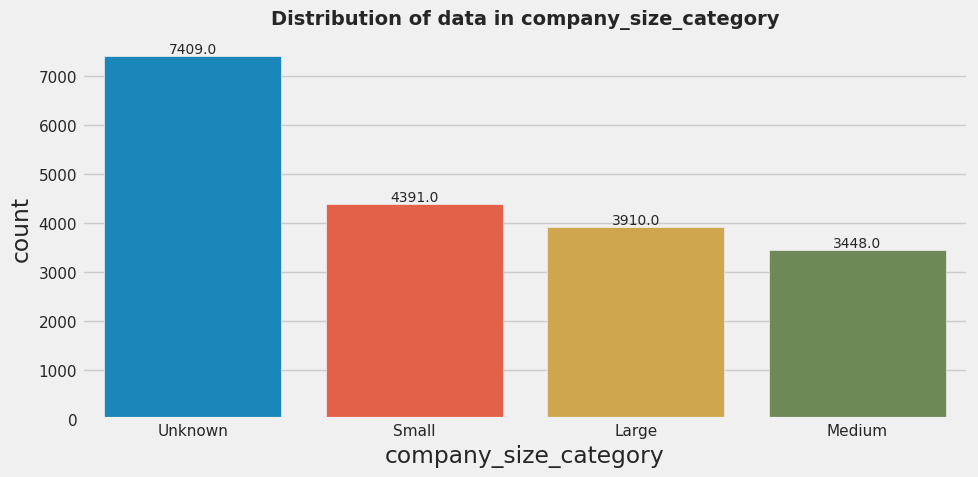

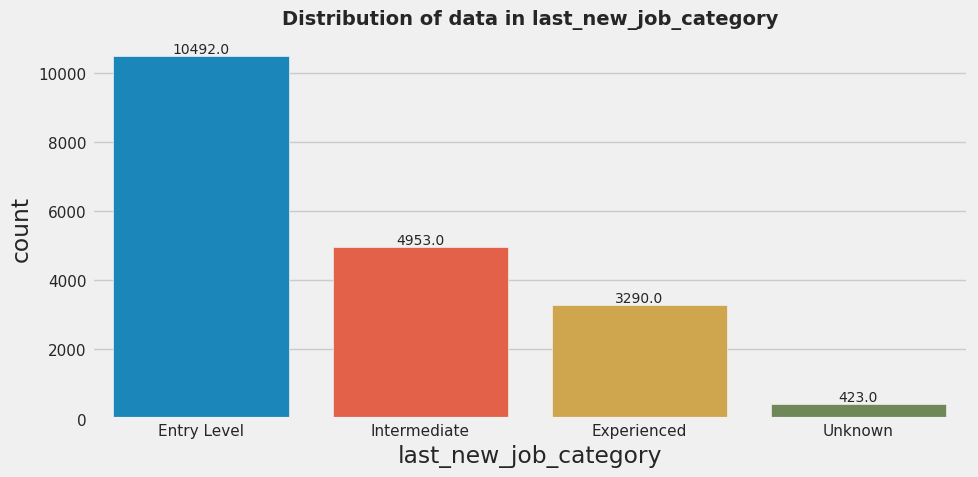

In [ ]:
cats_ordinal = ['city_category','experience_category', 'company_size_category', 'last_new_job_category']

# Tentukan urutan untuk setiap fitur kategoris
feature_orders = {
    'city_category': ['Highly Developed Cities', 'Moderately Developed Cities', 'Less Developed Cities'],
    'experience_category': ['Senior Level', 'Intermediate Level', 'Junior Level', 'Unknown'],
    'company_size_category': ['Large', 'Medium', 'Small'],
    'last_new_job_category': ['Experienced', 'Intermediate', 'Entry Level',]
}

# Buat satu gambar untuk semua plot hitung
plt.figure(figsize=(15, 10))

for i, feature in enumerate(cats_ordinal):
    # Create a subplot for each categorical feature
    plt.figure(figsize=(10, 5))

    # Countplot for categorical features
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of data in {feature}', size=14, fontweight='bold', pad=10)

    # Add frequency (count) labels to the bars
    total_count = len(df)
    ax = plt.gca()  # gets the current axes so that you can draw on it directly
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', size=10)

    plt.tight_layout()
    plt.show()

Semua data yang telah digeneralisasi memiliki persentase yang >2% sehingga dapat dilakukan untuk analisis selanjutnya

### Multivariate Analysis (10 Poin)

####Kolom Kategorikal

Melihat korelasi antara kolom kategorikal dengan Target.

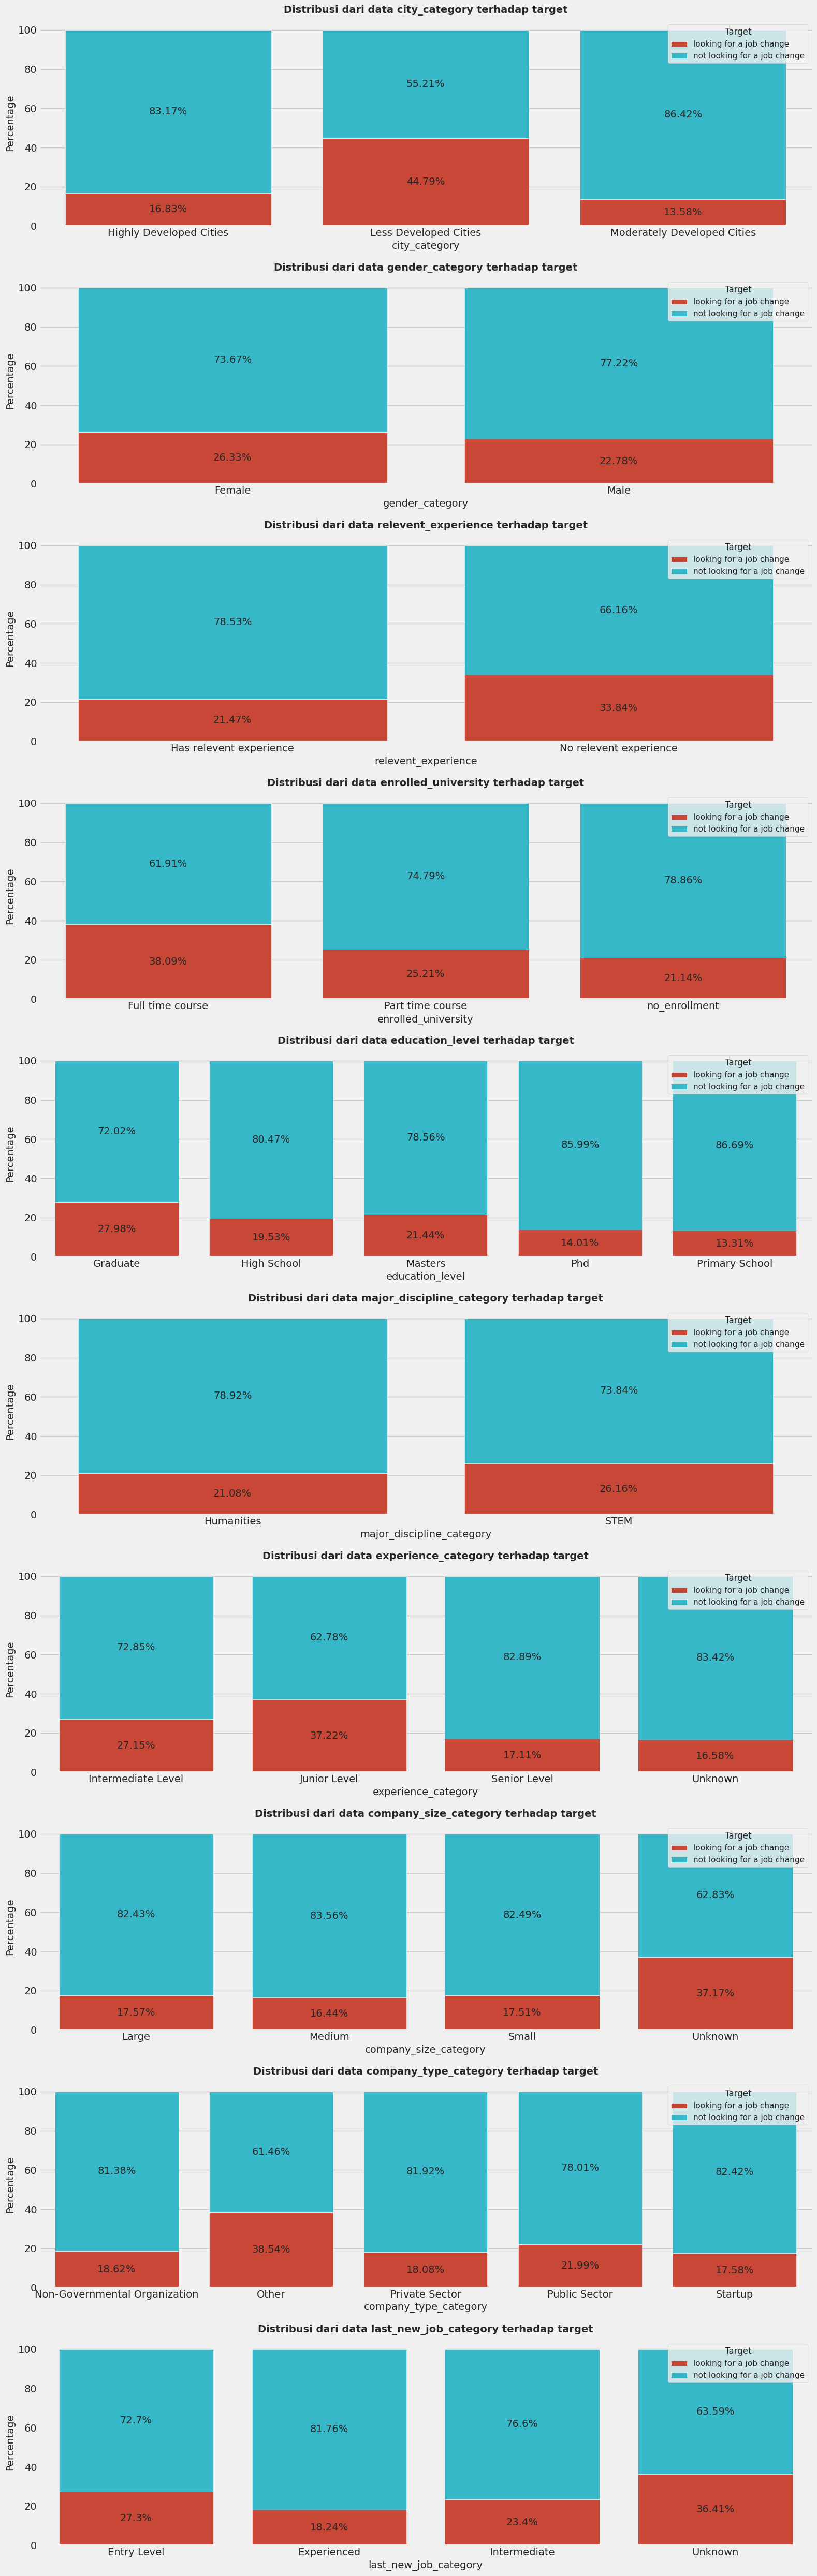

In [ ]:
# Memisahkan kolom berdasarkan tipe data
categorical_columns = ['city_category', 'gender_category', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline_category', 'experience_category', 'company_size_category', 'company_type_category', 'last_new_job_category']
target_column = 'target'

plt.figure(figsize=(16, 50))
for i, column in enumerate(categorical_columns):
    plt.subplot(10, 1, i+1)

    # Membuat crosstab antara kolom kategorikal dan kolom target
    crosstab = pd.crosstab(df[column], df[target_column])
    crosstab_percentage = crosstab.div(crosstab.sum(1), axis=0) * 100  # Menghitung persentase

    # Membuat stacked bar chart
    ax = sns.barplot(x=crosstab_percentage.index, y=crosstab_percentage[1], color='#E1341E', label='looking for a job change')
    ax = sns.barplot(x=crosstab_percentage.index, y=crosstab_percentage[0], color='#1ECBE1', label='not looking for a job change', bottom=crosstab_percentage[1])

    for c in ax.containers:
        labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 14) # add a container object "c" as first argument
    # Remove spines
    for s in ["top", "right"]:
        ax.spines[s].set_visible(False)
    # Add labels
    ax.tick_params(labelsize = 14, labelrotation = 0)
    ax.set_ylabel("Percentage", size = 14)
    ax.set_xlabel(column, size = 14)
    # Add legend
    ax.legend(fontsize = 12,
          title = "Target",
          title_fontsize = 18,
          bbox_to_anchor = [0.55, 0.7])


    plt.xticks(rotation=0)
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.title(f'Distribusi dari data {column} terhadap {target_column}', size=14, fontweight='bold', pad=10)
    plt.legend(title='Target', loc='upper right')



plt.grid(False)
plt.tight_layout()
plt.show()

<ipython-input-51-3000ac84b2fe>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['target'] == 1]['city_development_index'], label='Looking for a job change', shade=True, color='#E1341E')
<ipython-input-51-3000ac84b2fe>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['target'] == 0]['city_development_index'], label='Not looking for Job Change', shade=True, color='#1ECBE1')


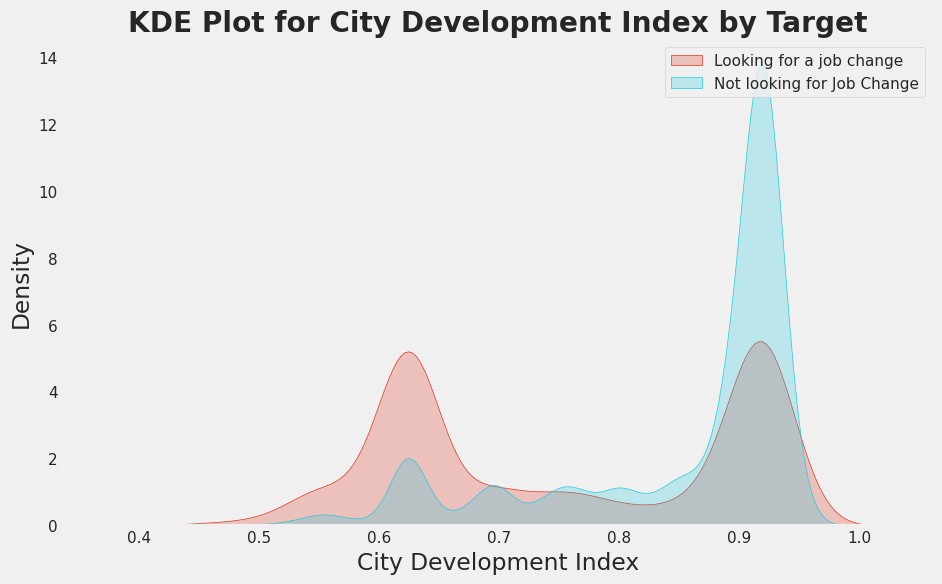

<ipython-input-51-3000ac84b2fe>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['target'] == 1]['training_hours'], label='Looking for a job change', shade=True, color='#E1341E')
<ipython-input-51-3000ac84b2fe>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['target'] == 0]['training_hours'], label='Not looking for Job Change', shade=True, color='#1ECBE1')


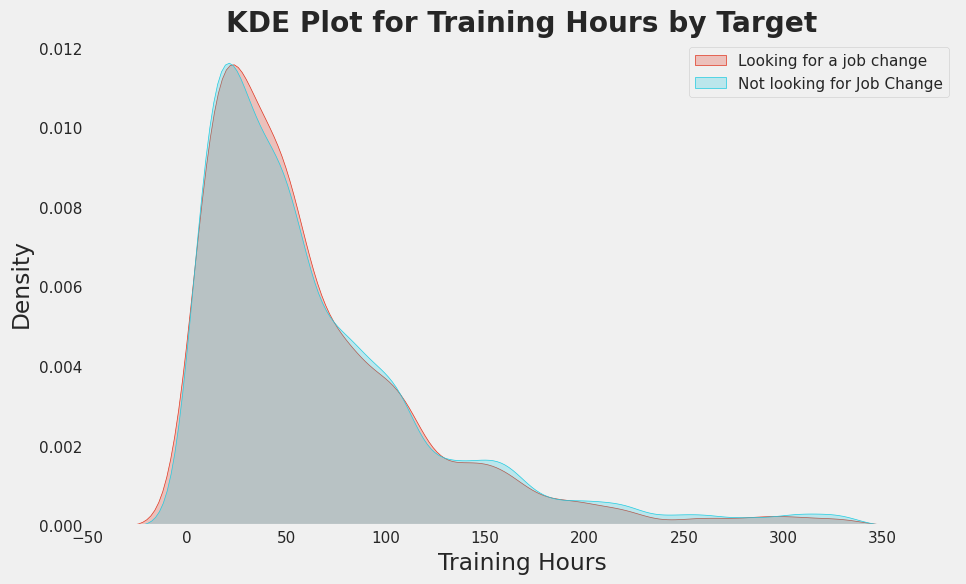

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['target'] == 1]['city_development_index'], label='Looking for a job change', shade=True, color='#E1341E')
sns.kdeplot(data=df[df['target'] == 0]['city_development_index'], label='Not looking for Job Change', shade=True, color='#1ECBE1')
sns.despine()
plt.xlabel('City Development Index')
plt.ylabel('Density')
plt.title('KDE Plot for City Development Index by Target', fontweight='bold')
plt.grid(False)
plt.legend()
plt.show()

# Create KDE plot for 'training_hours' with 'target' distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['target'] == 1]['training_hours'], label='Looking for a job change', shade=True, color='#E1341E')
sns.kdeplot(data=df[df['target'] == 0]['training_hours'], label='Not looking for Job Change', shade=True, color='#1ECBE1')
plt.xlabel('Training Hours')
plt.ylabel('Density')
plt.title('KDE Plot for Training Hours by Target', fontweight='bold')
plt.grid(False)
plt.legend()
plt.show()

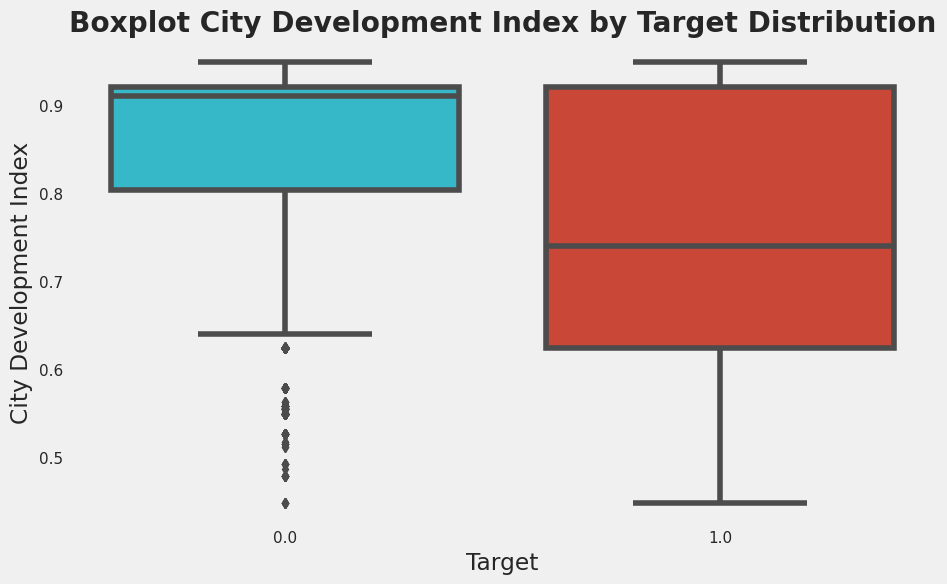

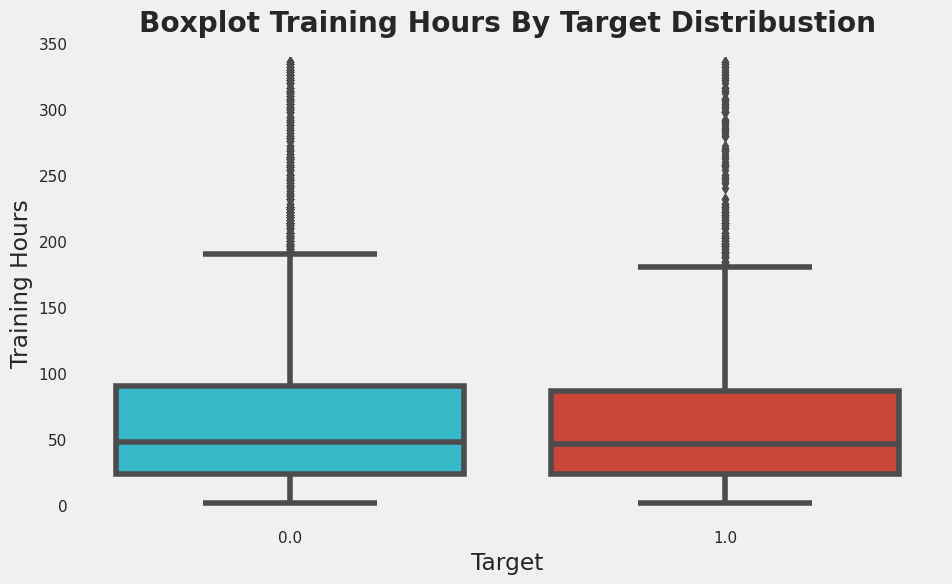

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='city_development_index', data=df, palette={0: '#1ECBE1', 1: '#E1341E'})
sns.despine()
plt.xlabel('Target')
plt.ylabel('City Development Index')
plt.title('Boxplot City Development Index by Target Distribution', fontweight='bold')
plt.grid(False)
plt.show()

# Buat boxplot untuk 'training_hours' dengan distribusi 'target' dengan warna yang diinginkan
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='training_hours', data=df, palette={0: '#1ECBE1', 1: '#E1341E'})
sns.despine()
plt.xlabel('Target')
plt.ylabel('Training Hours')
plt.title('Boxplot Training Hours By Target Distribustion', fontweight='bold')
plt.grid(False)
plt.show()

In [ ]:
fitur1 = 'education_level'
fitur2 = 'target'
# tabel kontingensi
contingency_table = pd.crosstab(df['education_level'], df['target'])

#  uji Chi-square
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output statistik Chi-square dan p-value
print('1. Melihat korelasi antara fitur Education Level dengan Target')
print(f"Statistik Chi-square: {chi2}")
print(f"P-value: {p}")

# Interpretasikan hasilnya
alpha = 0.05  # Ambil tingkat signifikansi 0.05
if p < alpha:
    print(f"Ada korelasi antara {fitur1} dan {fitur2}.")
else:
    print(f"Tidak ada korelasi antara {fitur1} dan {fitur2}.")

print( ' ' )
fitur3 = 'experience'
# tabel kontingensi
contingency_table = pd.crosstab(df['experience'], df['target'])

#  uji Chi-square
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output statistik Chi-square dan p-value
print('2. Melihat korelasi antara fitur Experience dengan Target')
print(f"Statistik Chi-square: {chi2}")
print(f"P-value: {p}")

# Interpretasikan hasilnya
alpha = 0.05  # Ambil tingkat signifikansi 0.05
if p < alpha:
    print(f"Ada korelasi antara {fitur3} dan {fitur2}.")
else:
    print(f"Tidak ada korelasi antara {fitur3} dan {fitur2}.")


print( ' ' )
fitur4 = 'relevent_experience'
# tabel kontingensi
contingency_table = pd.crosstab(df['relevent_experience'], df['target'])

#  uji Chi-square
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output statistik Chi-square dan p-value
print('3. Melihat korelasi antara kolom Relevant Experience dengan Target')
print(f"Statistik Chi-square: {chi2}")
print(f"P-value: {p}")

# Interpretasikan hasilnya
alpha = 0.05  # Ambil tingkat signifikansi 0.05
if p < alpha:
    print(f"Ada korelasi antara {fitur3} dan {fitur2}.")
else:
    print(f"Tidak ada korelasi antara {fitur3} dan {fitur2}.")


print( ' ' )
fitur5 = 'major_discipline'
# tabel kontingensi
contingency_table = pd.crosstab(df['major_discipline'], df['target'])

#  uji Chi-square
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output statistik Chi-square dan p-value
print('4. Melihat korelasi antara fitur Major Discipline dengan Target')
print(f"Statistik Chi-square: {chi2}")
print(f"P-value: {p}")

# Interpretasikan hasilnya
alpha = 0.05  # Ambil tingkat signifikansi 0.05
if p < alpha:
    print(f"Ada korelasi antara {fitur5} dan {fitur2}.")
else:
    print(f"Tidak ada korelasi antara {fitur5} dan {fitur2}.")


print( ' ' )
fitur6 = 'last_new_job'
# tabel kontingensi
contingency_table = pd.crosstab(df['last_new_job'], df['target'])

#  uji Chi-square
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output statistik Chi-square dan p-value
print('5. Melihat korelasi antara fitur last new job dengan Target')
print(f"Statistik Chi-square: {chi2}")
print(f"P-value: {p}")

# Interpretasikan hasilnya
alpha = 0.05  # Ambil tingkat signifikansi 0.05
if p < alpha:
    print(f"Ada korelasi antara {fitur6} dan {fitur2}.")
else:
    print(f"Tidak ada korelasi antara {fitur6} dan {fitur2}.")


print( ' ' )
fitur7 = 'gender'
# tabel kontingensi
contingency_table = pd.crosstab(df['gender'], df['target'])

#  uji Chi-square
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output statistik Chi-square dan p-value
print('6. Melihat korelasi antara fitur gender dengan Target')
print(f"Statistik Chi-square: {chi2}")
print(f"P-value: {p}")

# Interpretasikan hasilnya
alpha = 0.05  # Ambil tingkat signifikansi 0.05
if p < alpha:
    print(f"Ada korelasi antara {fitur7} dan {fitur2}.")
else:
    print(f"Tidak ada korelasi antara {fitur7} dan {fitur2}.")


print( ' ' )
fitur8 = 'company_type'
# tabel kontingensi
contingency_table = pd.crosstab(df['company_type'], df['target'])

#  uji Chi-square
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output statistik Chi-square dan p-value
print('7. Melihat korelasi antara fitur company_type dengan Target')
print(f"Statistik Chi-square: {chi2}")
print(f"P-value: {p}")

# Interpretasikan hasilnya
alpha = 0.05  # Ambil tingkat signifikansi 0.05
if p < alpha:
    print(f"Ada korelasi antara {fitur8} dan {fitur2}.")
else:
    print(f"Tidak ada korelasi antara {fitur8} dan {fitur2}.")


print( ' ' )
fitur9 = 'company_size'
# tabel kontingensi
contingency_table = pd.crosstab(df['company_size'], df['target'])

#  uji Chi-square
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output statistik Chi-square dan p-value
print('8. Melihat korelasi antara fitur company size dengan Target')
print(f"Statistik Chi-square: {chi2}")
print(f"P-value: {p}")

# Interpretasikan hasilnya
alpha = 0.05  # Ambil tingkat signifikansi 0.05
if p < alpha:
    print(f"Ada korelasi antara {fitur9} dan {fitur2}.")
else:
    print(f"Tidak ada korelasi antara {fitur9} dan {fitur2}.")


1. Melihat korelasi antara fitur Education Level dengan Target
Statistik Chi-square: 165.65538908718997
P-value: 8.949047910389231e-35
Ada korelasi antara education_level dan target.
 
2. Melihat korelasi antara fitur Experience dengan Target
Statistik Chi-square: 701.5739628056695
P-value: 6.174680933290918e-135
Ada korelasi antara experience dan target.
 
3. Melihat korelasi antara kolom Relevant Experience dengan Target
Statistik Chi-square: 315.33857672021657
P-value: 1.5006628411178982e-70
Ada korelasi antara experience dan target.
 
4. Melihat korelasi antara fitur Major Discipline dengan Target
Statistik Chi-square: 12.207121063439176
P-value: 0.0320573580013032
Ada korelasi antara major_discipline dan target.
 
5. Melihat korelasi antara fitur last new job dengan Target
Statistik Chi-square: 132.49948396906083
P-value: 7.015169967001471e-27
Ada korelasi antara last_new_job dan target.
 
6. Melihat korelasi antara fitur gender dengan Target
Statistik Chi-square: 9.0421817403733


**Hasil analisis uji korelasi Kolom Kategorik dengan target mnenggunakan Chi Square** :

1. Hasil uji Chi Square yang tinggi untuk Korelasi antara tingkat pendidikan (education_level) dan keinginan untuk mencari perubahan pekerjaan (target) signifikan. Artinya, tingkat pendidikan seseorang dapat memengaruhi apakah mereka mencari pekerjaan baru atau tidak. **Orang dengan tingkat pendidikan yang berbeda mungkin memiliki preferensi atau motivasi yang berbeda dalam mencari pekerjaan**.

2. Hasil uji Chi-square menunjukkan bahwa terdapat korelasi sangat kuat antara lama pengalaman (experience) dan keinginan untuk mencari perubahan pekerjaan (target). P-value yang sangat rendah (mendekati nol) menunjukkan bahwa hubungan ini sangat signifikan secara statistik. Ini berarti bahwa lama pengalaman seseorang memengaruhi keputusan mereka untuk mencari pekerjaan baru.   **Semakin lama seseorang memiliki pengalaman, semakin besar kemungkinan mereka tidak mencari perubahan pekerjaan (target "0"). Sebaliknya, mereka yang memiliki pengalaman yang lebih pendek cenderung mencari perubahan pekerjaan (target "1")**.

3. Uji Chi-square pengalaman yang relevan (relevant_experience) dengan keinginan untuk mencari perubahan pekerjaan (target) juga korelasiny kuat. P-value juga rendah (mendekati nol) menunjukkan hubungan ini sangat signifikan secara statistik. Ini berarti bahwa memiliki pengalaman yang relevan memengaruhi keputusan individu untuk mencari pekerjaan baru. **Kandidat yang memiliki pengalaman yang relevan (Relevant Experience = "Has relevant experience") cenderung kurang mencari perubahan pekerjaan (target "0"). Sebaliknya, mereka yang tidak memiliki pengalaman yang relevan (Relevant Experience = "No relevant experience") lebih cenderung mencari perubahan pekerjaan (target "1")**.

4. Hasil uji Chi-square menunjukkan bahwa terdapat korelasi antara disiplin utama pendidikan (major_discipline) dan keinginan individu untuk mencari perubahan pekerjaan (target). P-value yang diperoleh adalah sekitar 0.032, yang lebih kecil dari tingkat signifikansi alfa biasa 0.05. **individu dengan disiplin utama pendidikan tertentu mungkin lebih cenderung mencari pekerjaan baru daripada mereka dengan disiplin utama pendidikan lainnya.**

5. Hasil uji Chi-square menunjukkan bahwa terdapat korelasi antara selisih tahun antara pekerjaan sebelumnya dan pekerjaan saat ini (last_new_job) dengan keinginan individu untuk mencari perubahan pekerjaan (target) dan P-value rendah mendekati nol (kurang dari 0.05).**Selisih waktu antara pekerjaan sebelumnya dan pekerjaan saat ini berpengaruh signifikan terhadap keputusan seseorang untuk mencari pekerjaan baru**

6. Berdasarkan hasil uji chi-square, dapat disiimpulkan bahwa ada hubungan antara variabel "gender" (yaitu, jenis kelamin kandidat) dan variabel "target" (apakah kandidat sedang mencari perubahan pekerjaan atau tidak). **Berarti jenis perusahaan tempat kandidat bekerja memengaruhi keputusan apakah mereka mencari perubahan pekerjaan atau tidak**.

7. Dari hasil uji chi-square tersebut, dapat disimpulkan bahwa ada korelasi atau hubungan yang signifikan antara jenis "company_type" (tipe perusahaan tempat kandidat bekerja) dengan "target" (apakah kandidat mencari perubahan pekerjaan atau tidak). **Berarti ukuran perusahaan tempat kandidat bekerja dapat memengaruhi keputusan apakah mereka mencari perubahan pekerjaan atau tidak**.



### Numerikal

In [ ]:
import pandas as pd
from scipy import stats

In [ ]:
#menyiapkan list baru untuk menampung nilai p-value & column
p_value_array, cols = [], []

# menghitung P-Value antara kolom numerikal dengan data target
for variable in nums[:-1]:
    groups = [df[df['target'] == target][variable] for target in df['target'].unique()]
    f_statistic, p_value =  stats.ttest_ind(*groups)

    p_value_array.append(p_value)
    cols.append(variable)

#masukan hasi p-value kedalam dataframe baru
uji_test = pd.DataFrame({'Cols':cols,
                         'P-Value':p_value_array})

uji_test['Keterangan'] = ['Terdapat perbedaan signifikan' if x < 0.05 else 'Tidak terdapat perbedaan signifikan' for x in uji_test['P-Value']]
uji_test

,Cols,P-Value,Keterangan
0,city_development_index,0.00000,Terdapat perbedaan signifikan
1,training_hours,0.00282,Terdapat perbedaan signifikan


Analisis T-test

Kedua variabel prediktor yaitu city_development index dan training_hours berpengaruh secara signifikan terhadap peserta yang ingin 'job changes' atau 'not looking for job change'

In [ ]:
uji_test2 = pd.DataFrame({'Target':[0.0, 1.0],
                          'Mean_city_development_index':[df[df['target']==0.0]['city_development_index'].mean(), df[df['target']==1.0]['city_development_index'].mean()],
                          'Mean_training_hours':[df[df['target']==0.0]['training_hours'].mean(), df[df['target']==1.0]['training_hours'].mean()]})

uji_test2['Target'] = uji_test2['Target'].map({0.0:'Not looking for job changes', 1.0:'looking for job changes'})

In [ ]:
def uji(df, col1, col2, col3): #target, 'Mean_city_development_index', 'Mean_training_hours'
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))

    sns.barplot(ax=ax[0], x=col1, y=col2, data=df, ci=None)
    for i in ax[0].containers:
        ax[0].bar_label(i,)
    ax[0].set_title('Mean_city_development_index vs Target')

    # multi vs realsum
    sns.barplot(ax=ax[1], x=col1, y=col3, data=df, ci=None)
    for i in ax[1].containers:
        ax[1].bar_label(i,)
    ax[1].set_title('Mean_training_hours vs Target')

<ipython-input-10-679c904a7b9b>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax[0], x=col1, y=col2, data=df, ci=None)
<ipython-input-10-679c904a7b9b>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax[1], x=col1, y=col3, data=df, ci=None)


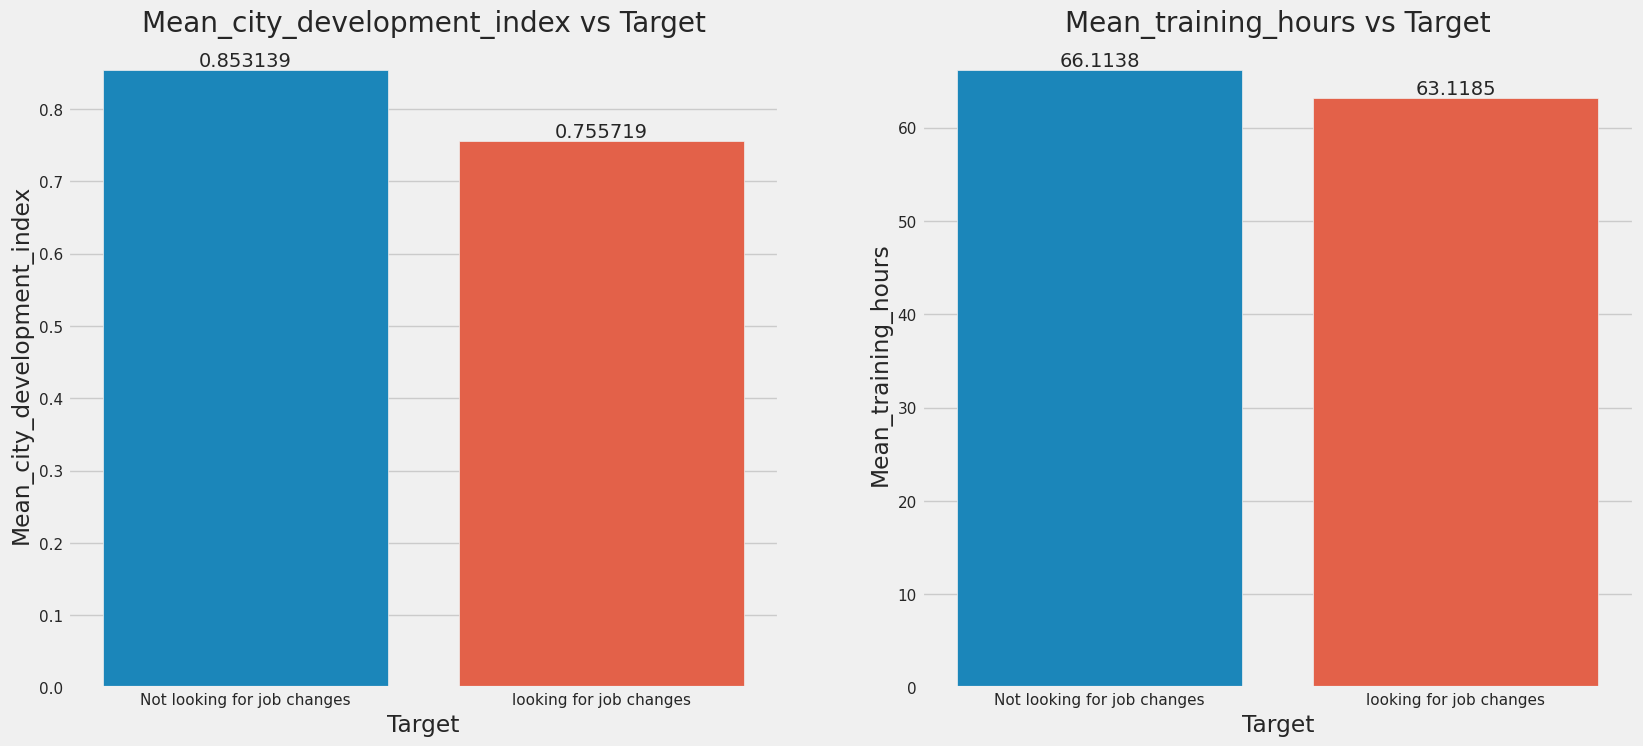

In [ ]:
uji(uji_test2, 'Target', 'Mean_city_development_index', 'Mean_training_hours')

1. peserta yang cenderung meninggalkan perusahaan setelah training memiliki karakter tempat tinggal di kota yang didominasi oleh city index yang rendah
2. peserta yang cenderung meninggalkan perusahaan setelah training memiliki karakter yang didominasi oleh training hours yang rendah

## Multivariate Analysis
### category_1, category_2 vs target

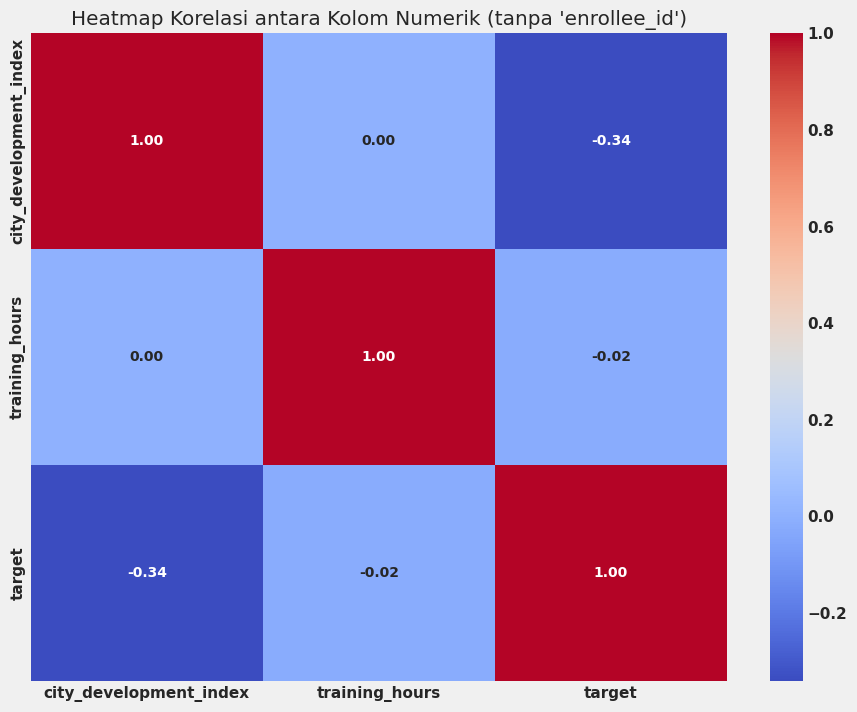

In [ ]:
# Assuming you have already read the CSV file into the DataFrame df
# Selecting numeric columns (excluding 'enrollee_id')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['enrollee_id'])

# Calculating the correlation between numeric columns
correlation_matrix = numeric_cols.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antara Kolom Numerik (tanpa 'enrollee_id')")
plt.show()

Dari heatmap dapat dilihat bahwa city development index dengan hubungan terbalik terbesar. Selain itu, variabel lain yaitu Training_hour memiliki hubungan terbalik yang sama meski kekuatannya lemah.

Experience, city_development_index vs target

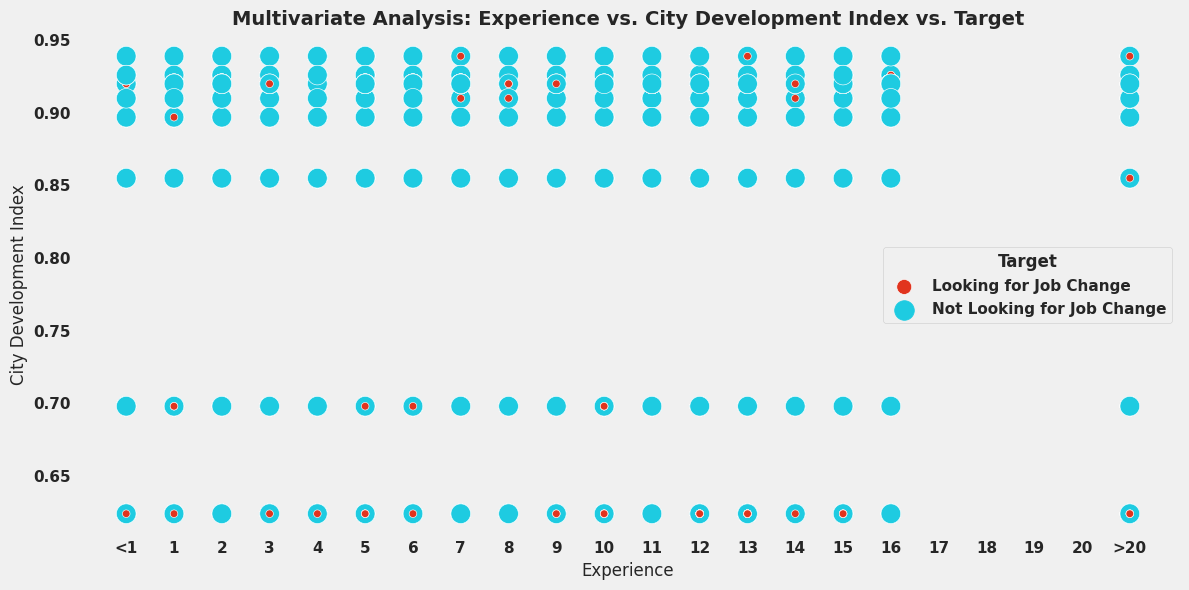

In [ ]:
# Define custom colors for 0 (Not Looking for Job Change) and 1 (Looking for Job Change)
custom_colors = {0: '#1ECBE1', 1: '#E1341E'}

# Define the order of X-axis labels for experience
experience_order = ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20']

# Set the order of X-axis labels for the 'experience' column
df['experience'] = pd.Categorical(df['experience'], categories=experience_order, ordered=True)

# Create a scatterplot with custom colors for target
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='experience', y='city_development_index', hue='target', palette=custom_colors, size='target', sizes=(30, 200))

plt.title('Multivariate Analysis: Experience vs. City Development Index vs. Target', fontsize=14, fontweight='bold')
plt.xlabel('Experience')
plt.ylabel('City Development Index')
plt.legend(title='Target', labels=['Looking for Job Change', 'Not Looking for Job Change'])

plt.grid(False)
plt.tight_layout()
plt.show()

Insight:
Orang dengan pengalaman kerja lebih lama dan tinggal di kota dengan development index yang tinggi cenderung tidak mencari pekerjaan baru.

<ipython-input-38-0df7d115e61b>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='company_size_category', y='city_development_index', hue='target', data=df, palette=colors, ci= None)


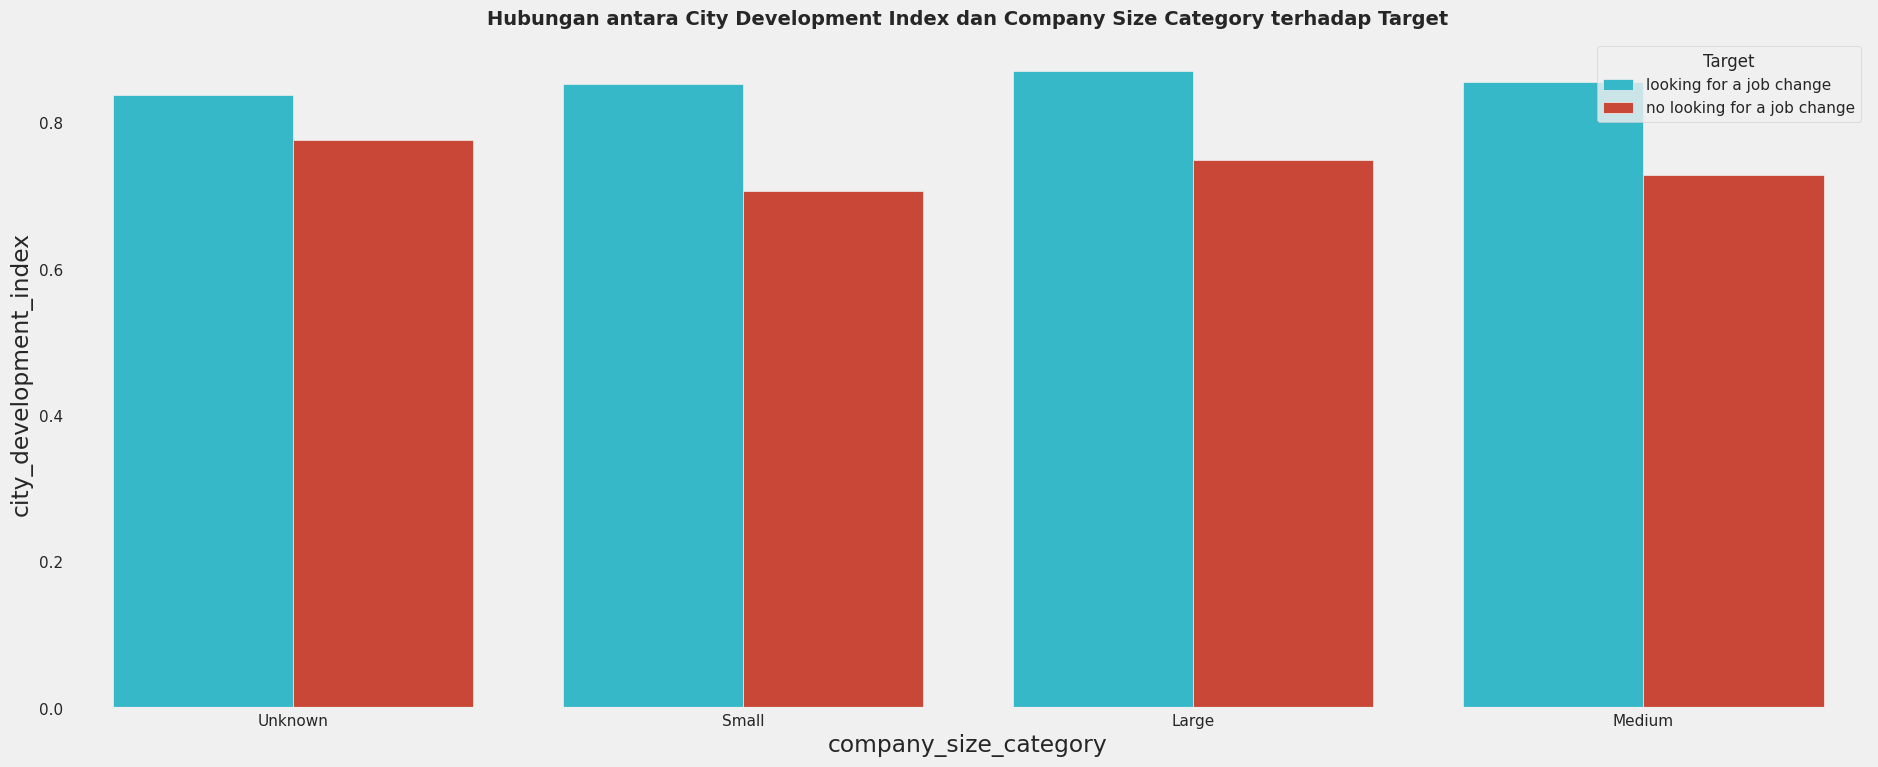

In [ ]:
colors = {1.0: "#E1341E", 0.0: "#1ECBE1"}

# Plot bar dengan hue menggunakan kolom 'city_development_index' dan 'company_size_category' terhadap target
ax = sns.barplot(x='company_size_category', y='city_development_index', hue='target', data=df, palette=colors, ci= None)
# Menambahkan label pada sumbu-x
plt.xlabel('company_size_category')
# Menambahkan judul plot
plt.title('Hubungan antara City Development Index dan Company Size Category terhadap Target', size=14, fontweight='bold', pad=10)
# Mengganti label legenda
legend_labels = {1.0: 'looking for a job change', 0.0: 'no looking for a job change'}  # Sesuaikan dengan nilai target Anda
# Mendapatkan legenda dari plot
handles, _ = ax.get_legend_handles_labels()
# Mengatur ulang label legenda
for i, label in enumerate(handles):
    label.set_label(legend_labels[df['target'].unique()[i]])
# Menampilkan legenda
plt.legend(title='Target', title_fontsize=12, loc='upper right')
# Menampilkan plot
plt.grid(False)
plt.show()

Insight : <br>Pada barplot diatas, diketahui bahwa orang-orang yang berasal dari company_size_category small, large, maupun medium  yang memilih untuk **tidak mencari pekerjaan baru** di perusahaan setelah mengikuti training berada di kota dengan **index > 0.800** atau **Moderately Developed Cities**. Sedangkan, orang-orang yang **mencari pekerjaan baru** setelah mengikuti training berada di kota dengan **index < 0.800** atau **Less Developed Cities**.

<ipython-input-35-6a82d26b8d6e>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='company_size_category', y='experience', hue='target', data=df, palette=colors, ci=None)


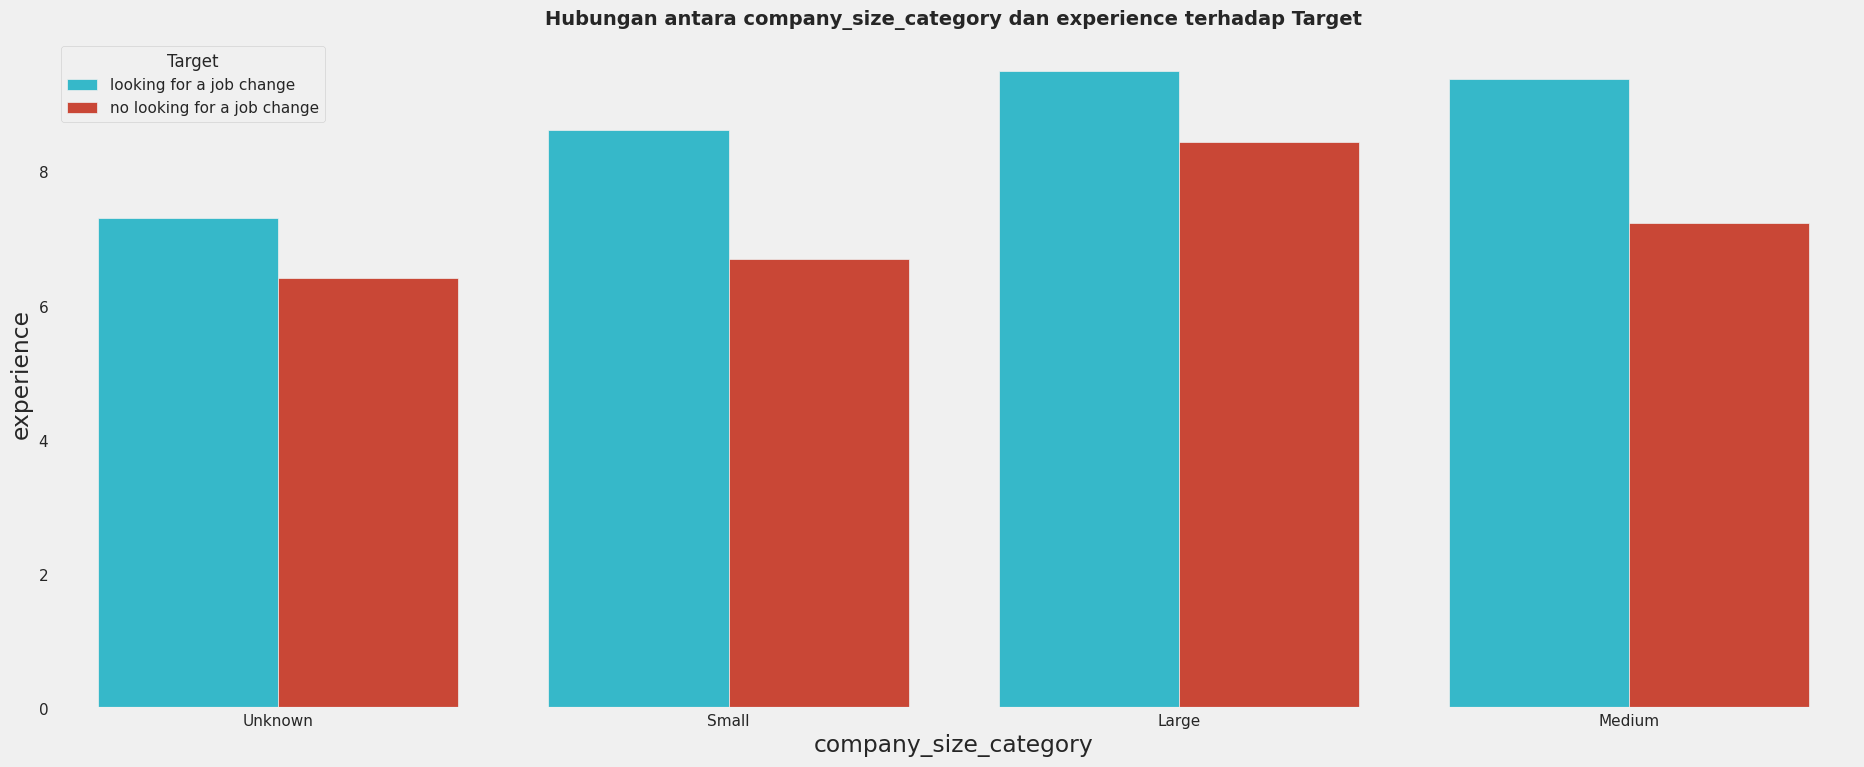

In [ ]:
df['experience'] = pd.to_numeric(df['experience'], errors='coerce')
colors = {1.0: "#E1341E", 0.0: "#1ECBE1"}
# Mengubah kolom "experience" menjadi float
# Plot bar dengan hue menggunakan kolom 'city_development_index' dan 'company_size_category' terhadap target
ax = sns.barplot(x='company_size_category', y='experience', hue='target', data=df, palette=colors, ci=None)
# Menambahkan label pada sumbu-x
plt.xlabel('company_size_category')
# Menambahkan judul plot
plt.title('Hubungan antara company_size_category dan experience terhadap Target', size=14, fontweight='bold', pad=10)
# Mengganti label legenda
legend_labels = {1.0: 'looking for a job change', 0.0: 'no looking for a job change'}  # Sesuaikan dengan nilai target Anda
# Mendapatkan legenda dari plot
handles, _ = ax.get_legend_handles_labels()
# Mengatur ulang label legenda
for i, label in enumerate(handles):
    label.set_label(legend_labels[df['target'].unique()[i]])
# Menampilkan legenda
plt.legend(title='Target', title_fontsize=12, loc='upper left')
# Menampilkan plot
plt.grid(False)
plt.show()

Insight : <br>Pada barplot diatas, diketahui bahwa orang-orang yang berasal dari company_size_category small, large, maupun medium  yang memilih untuk **tidak mencari pekerjaan baru** di perusahaan setelah mengikuti training memiliki **pengalaman kerja > 10 tahun**. Sedangkan, orang-orang yang **mencari pekerjaan baru** setelah mengikuti training memiliki **pengalaman kerja < 8 tahun**, kecuali untuk **company_size_category large** memiliki **pengalaman kerja > 8 tahun**.

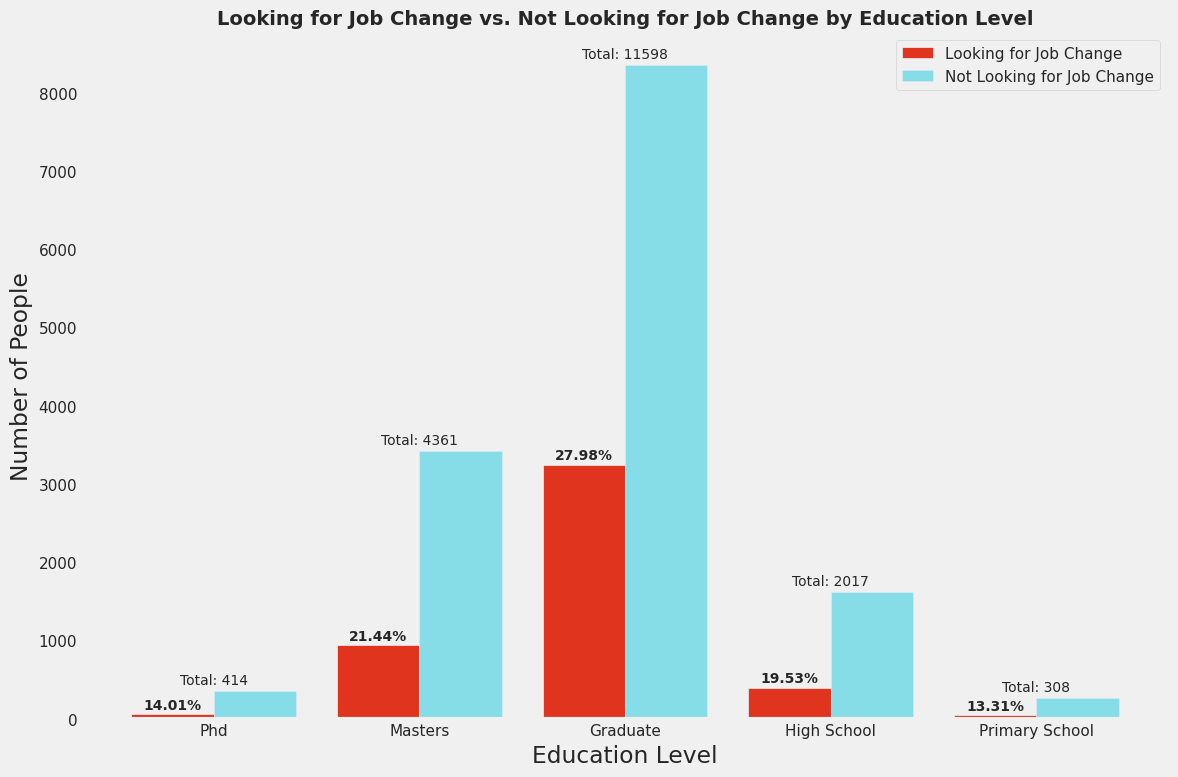

In [14]:
dft = df.copy()
# Create a pivot table to count the number of people for each combination of gender and target
pivot_table_edu = dft.pivot_table(index='education_level', columns='target', values='enrollee_id', aggfunc='count', fill_value=0)

# Rename the columns for clarity
pivot_table_edu.columns = ['Not Looking for Job Change', 'Looking for Job Change']

# Reset the index to make 'gender' a regular column
pivot_table_edu.reset_index(inplace=True)


pivot_table_edu['Total Enrollees'] = pivot_table_edu['Not Looking for Job Change'] + pivot_table_edu['Looking for Job Change']

# Calculate the percentage of people looking for a new job from the total enrollees
pivot_table_edu['Percentage Looking for Job Change'] = (pivot_table_edu['Looking for Job Change'] / pivot_table_edu['Total Enrollees'] * 100).round(2)

pivot_table_edu = pivot_table_edu.sort_values('Percentage Looking for Job Change', ascending=False)
pivot_table_edu

# Define the order for sorting education levels
order = ["Phd", "Masters", "Graduate", "High School", "Primary School"]

pivot_table_edu = pivot_table_edu.set_index('education_level').loc[order].reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Define the colors for the bars
looking_for_job_change_color = "#E1341E"  # Red color
not_looking_for_job_change_color = "#1ECBE1"  # Blue color

# Create a grouped bar chart
bar_width = 0.4
positions = range(len(pivot_table_edu['education_level']))

plt.bar(positions, pivot_table_edu['Looking for Job Change'], bar_width, label='Looking for Job Change', color=looking_for_job_change_color)
plt.bar([pos + bar_width for pos in positions], pivot_table_edu['Not Looking for Job Change'], bar_width, label='Not Looking for Job Change', color=not_looking_for_job_change_color, alpha=0.5)

plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.title('Looking for Job Change vs. Not Looking for Job Change by Education Level', fontsize=14, fontweight='bold')
plt.xticks([pos + bar_width / 2 for pos in positions], pivot_table_edu['education_level'])

# Display the percentage values above the "Looking for Job Change" bar
# Display the total enrollee count between the bars
for i, row in pivot_table_edu.iterrows():
    plt.text(i + bar_width/2, max(row['Looking for Job Change'], row['Not Looking for Job Change']) + 50,
             f"Total: {row['Total Enrollees']}", ha='center', va='bottom', fontsize=10)
    plt.text(i + bar_width-0.40, row['Looking for Job Change'] + 30,
             f"{row['Percentage Looking for Job Change']}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(False)

plt.legend()
plt.tight_layout()
plt.show()

Insight : <br>
Dari keseluruhan Karyawan yang diberikan training, Karyawan yang tingkat pendidikan Graduate lah yang paling tinggi yaitu 11598 dari 19158 karyawan, dan juga yang paling banyak tetap stay di perusahaan **(27.98% dari 11958 karyawan graduate Churn)**. Karyawan tingkat pendidikan Primary School yang paling rendah dari keseluruhan karyawan yang diberikan training ini(308 Karyawan).

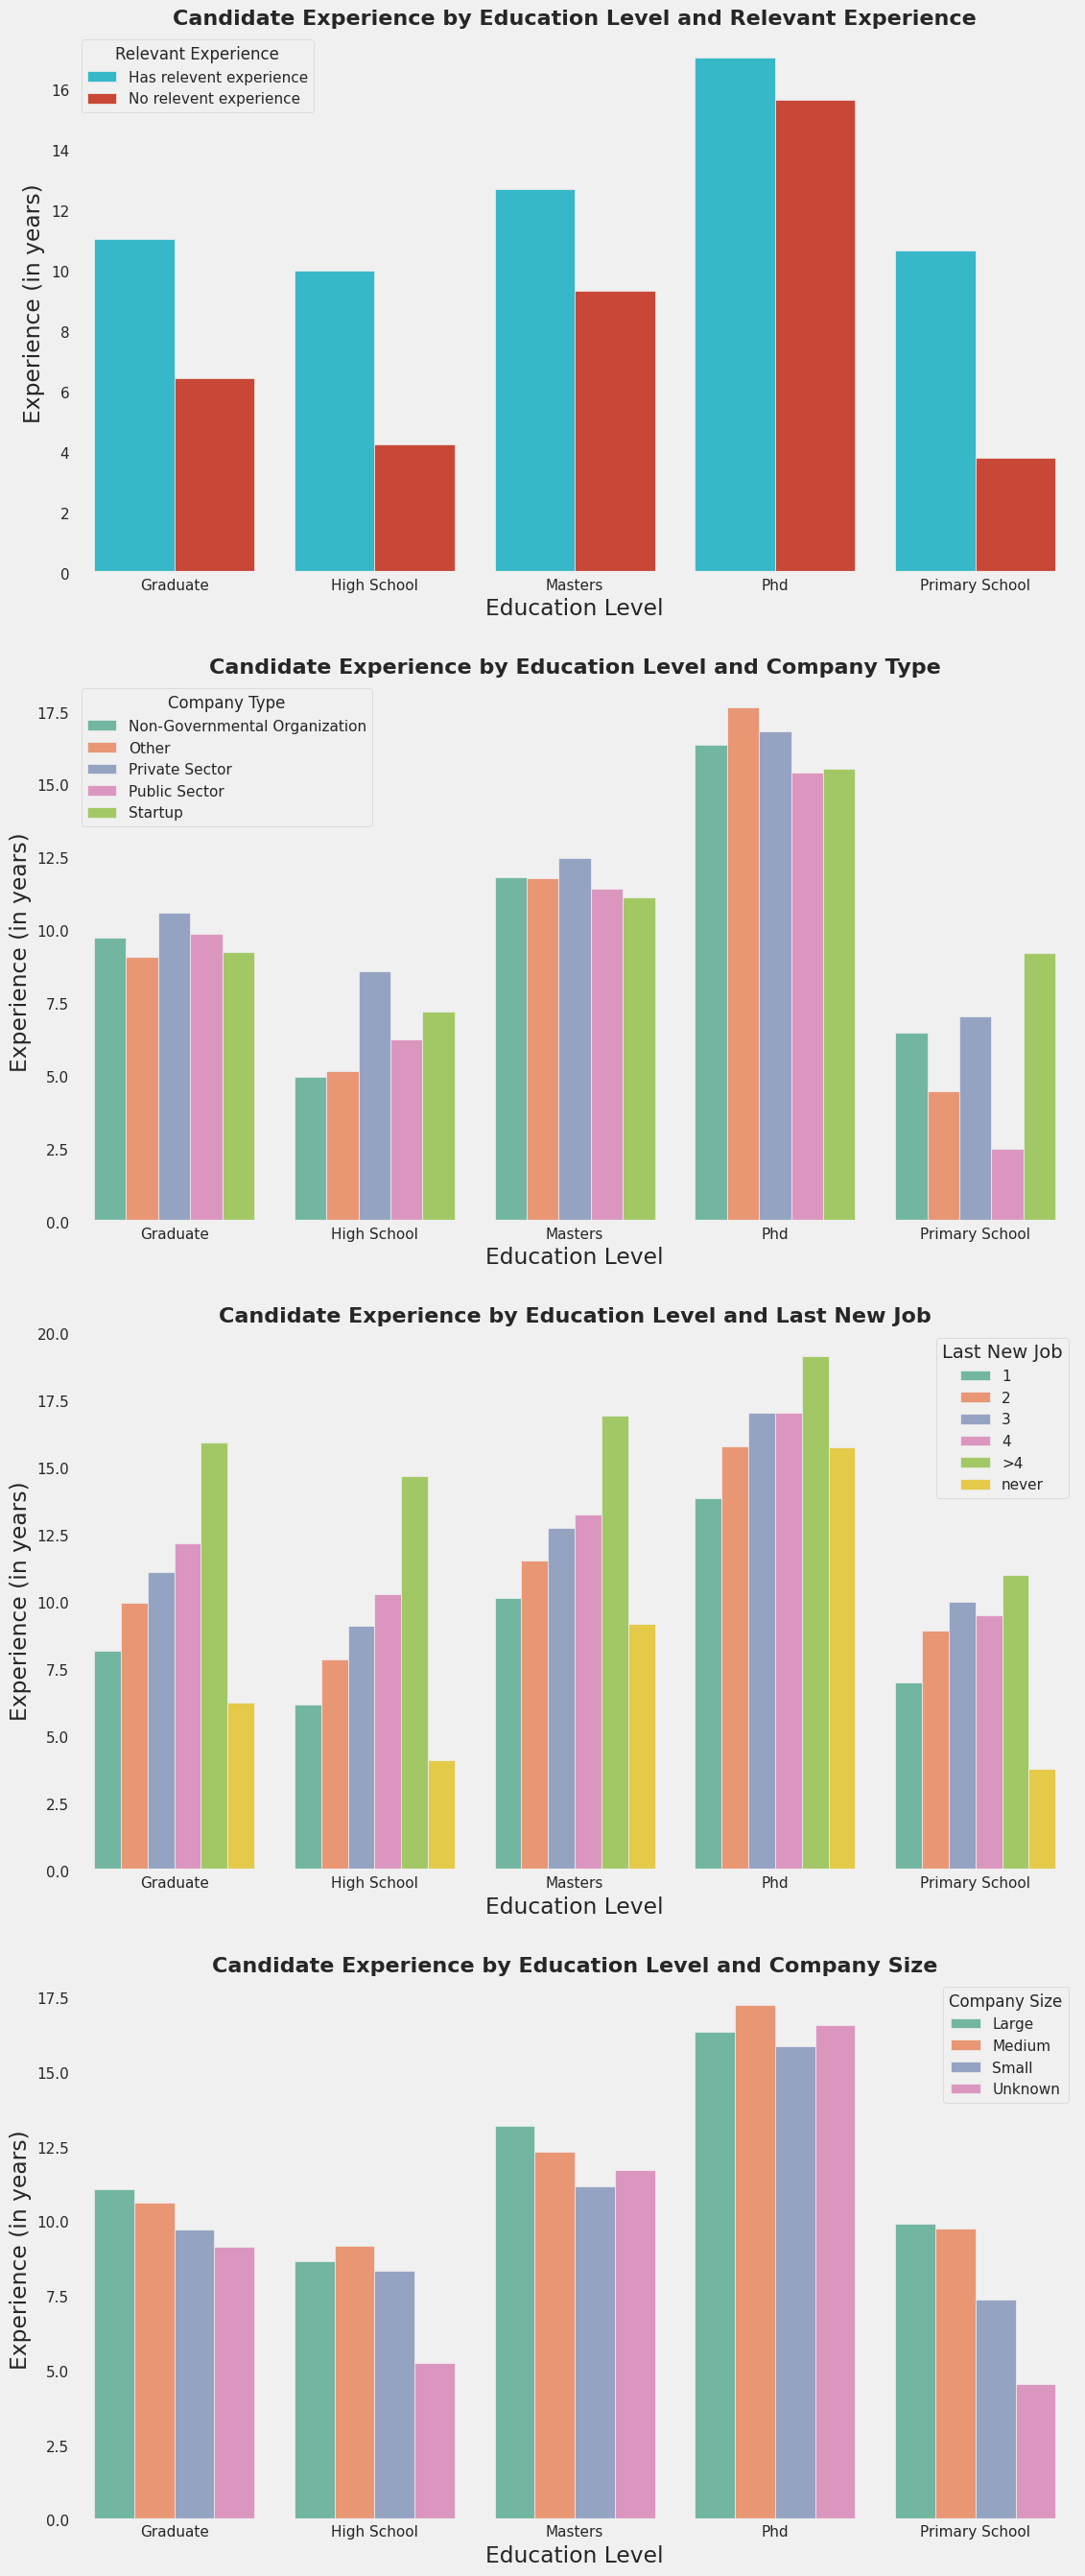

In [17]:
dft = df.copy()
dft['experience'] = dft['experience'].replace({'<1': '0', '>20': '21'}).astype(float)
# Column company_size
conditions_company_size = [
    (dft['company_size'].isin(['50-99', '<10'])),
    (dft['company_size'].isin(['100-500', '50-499', '500-999'])),
    (dft['company_size'].isin(['1000-4999', '5000-9999', '10000+']))
]

choices_company_size = ['Small', 'Medium', 'Large']
dft['company_size_category'] = np.select(conditions_company_size, choices_company_size, default='Unknown')

# Column company_type
conditions_company_type = [
    (dft['company_type'] == 'Pvt Ltd'),
    (dft['company_type'].isin(['Funded Startup', 'Early Stage Startup'])),
    (dft['company_type'] == 'Public Sector'),
    (dft['company_type'] == 'NGO')
]

choices_company_type = ['Private Sector', 'Startup', 'Public Sector', 'Non-Governmental Organization']
dft['company_type_category'] = np.select(conditions_company_type, choices_company_type, default='Other')


# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 32))
custom_palette = ['#1ECBE1', '#E1341E']
# Group and plot the first figure
education_relevant_avg_experience = dft.groupby(['education_level', 'relevent_experience'])['experience'].mean().reset_index()
sns.barplot(data=education_relevant_avg_experience, x='education_level', y='experience', hue='relevent_experience', palette=custom_palette, ax=axes[0])
sns.despine(ax=axes[0])
axes[0].set_title('Candidate Experience by Education Level and Relevant Experience', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Experience (in years)')
axes[0].legend(title='Relevant Experience')
axes[0].grid(False)

# Group and plot the second figure
education_company_avg_experience = dft.groupby(['education_level', 'company_type_category'])['experience'].mean().reset_index()
sns.barplot(data=education_company_avg_experience, x='education_level', y='experience', hue='company_type_category', palette='Set2', ax=axes[1])
sns.despine(ax=axes[1])
axes[1].set_title('Candidate Experience by Education Level and Company Type', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Experience (in years)')
axes[1].legend(title='Company Type')
axes[1].grid(False)

# Group and plot the third figure
education_newjob_avg_experience = dft.groupby(['education_level', 'last_new_job'])['experience'].mean().reset_index()
ax = sns.barplot(data=education_newjob_avg_experience, x='education_level', y='experience', hue='last_new_job', palette='Set2', ax=axes[2])
sns.despine(ax=axes[2])
ax.set_title('Candidate Experience by Education Level and Last New Job', fontsize=16, fontweight='bold')
ax.set_xlabel('Education Level')
ax.set_ylabel('Experience (in years)')
ax.legend(title='Last New Job', title_fontsize='14', loc='upper right')
ax.grid(False)

# Group and plot the fourth figure
education_companysize_avg_experience = dft.groupby(['education_level', 'company_size_category'])['experience'].mean().reset_index()
sns.barplot(data=education_companysize_avg_experience, x='education_level', y='experience', hue='company_size_category', palette='Set2', ax=axes[3])
sns.despine(ax=axes[3])
axes[3].set_title('Candidate Experience by Education Level and Company Size', fontsize=16, fontweight='bold')
axes[3].set_xlabel('Education Level')
axes[3].set_ylabel('Experience (in years)')
axes[3].legend(title='Company Size', loc='upper right')
axes[3].grid(False)

# Show the plots
plt.show()



Insight :<br>
* Dari keempat visual barplot tersebut dapat dilihat bahwa Phd memiliki rata-rata pengalaman paling tinggi dibandingkan dengan yang lainnya namun total karyawan yang berlatar belakang Phd ini hanya sedikit totalnya (414 orang) sedangkan jika dilihat dari tingkat pendidikan graduate, rata-rata pengalamannya tidak terlalu tinggi dibandingkan dengan yang lain, namun karyawan dengan tingkat pendidikan inilah yang paling banyak ada di perusahaan dibandingkan dengan karyawan dengan tingkat pendidkan lain.

* di plot Candidate Experience by Education Level and Relevant Experience, tingkat pendidikan Phd mempunyai pengalaman lebih lama namun yang churn dan yang stay tidak jauh berbeda.Hal ini menunjukkan bahwa meskipun memiliki pengalaman, karyawan Ph.D. mungkin memiliki tantangan yang sama dengan karyawan lain dalam hal retensi.

* dilihat dari plot experience by education level and last new job, karyawan yang sudah bekerja lebih dari 4 kali mempunyai pengalaman yang lebih lama, karyawan yang bertingkat pendidikan graduate dan master pengalamannya tidak jauh berbeda disini

* Pada plot terakhir, pengalaman karyawan dibandingkan dengan tingkat pendidikan dan ukuran perusahaan. Karyawan dengan tingkat pendidikan Graduate memiliki pengalaman yang belum terlalu banyak di perusahaan, sementara karyawan dengan tingkat Ph.D. memiliki pengalaman yang paling lama. Ini dapat menunjukkan bahwa Ph.D. cenderung bertahan dalam perusahaan lebih lama, sementara Graduate mungkin lebih sering mengalami pergantian pekerjaan.